In [ ]:
pip install xlrd


In [ ]:
pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('ECommerce.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# Understanding the dataset

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:')
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




# Handling the Missing Values

Copying the data frame into another one

In [ ]:
df1=df.copy()

In [ ]:
df.drop(['CustomerID'],axis=1, inplace=True)

Lets first single out those variables where there are missing values:

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

Tenure
the total null values are: 264
the datatype is float64

WarehouseToHome
the total null values are: 251
the datatype is float64

HourSpendOnApp
the total null values are: 255
the datatype is float64

OrderAmountHikeFromlastYear
the total null values are: 265
the datatype is float64

CouponUsed
the total null values are: 256
the datatype is float64

OrderCount
the total null values are: 258
the datatype is float64

DaySinceLastOrder
the total null values are: 307
the datatype is float64



Also converting the Churn variable to object

In [ ]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.0,3.0,6.0,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.751023,1.894621,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0


In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

<ipython-input-17-ec42ec9b0dd6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace=True)


# Outlier Treatment

Text(0, 0.5, 'Values')

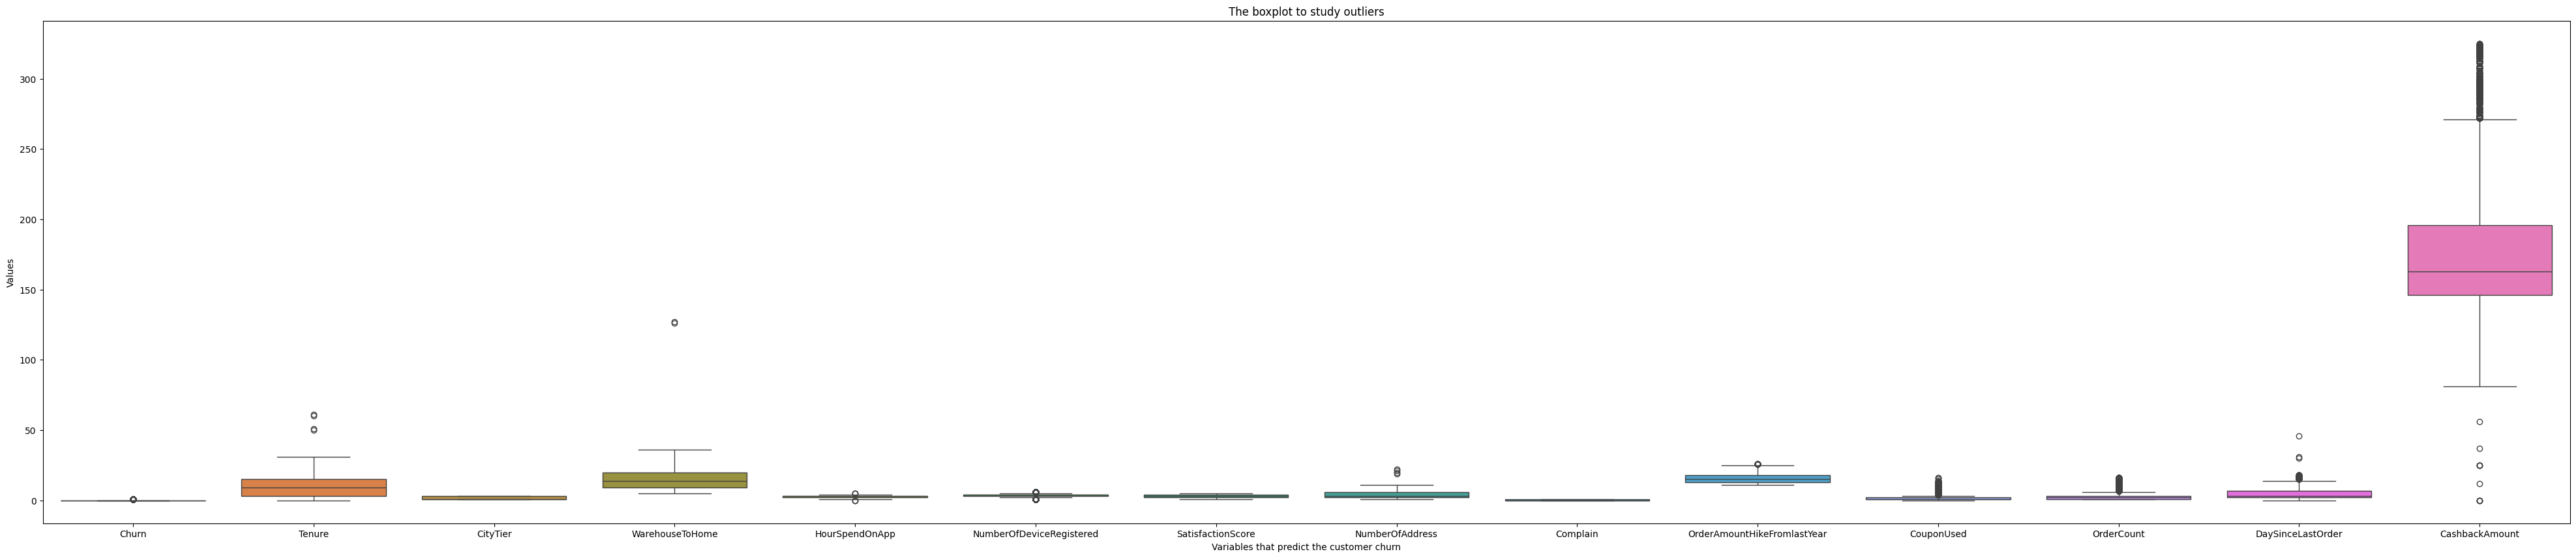

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

Here we can see that there are quite a lot of outliers in almost all of the variables. Lets treat these outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

Text(0, 0.5, 'Values')

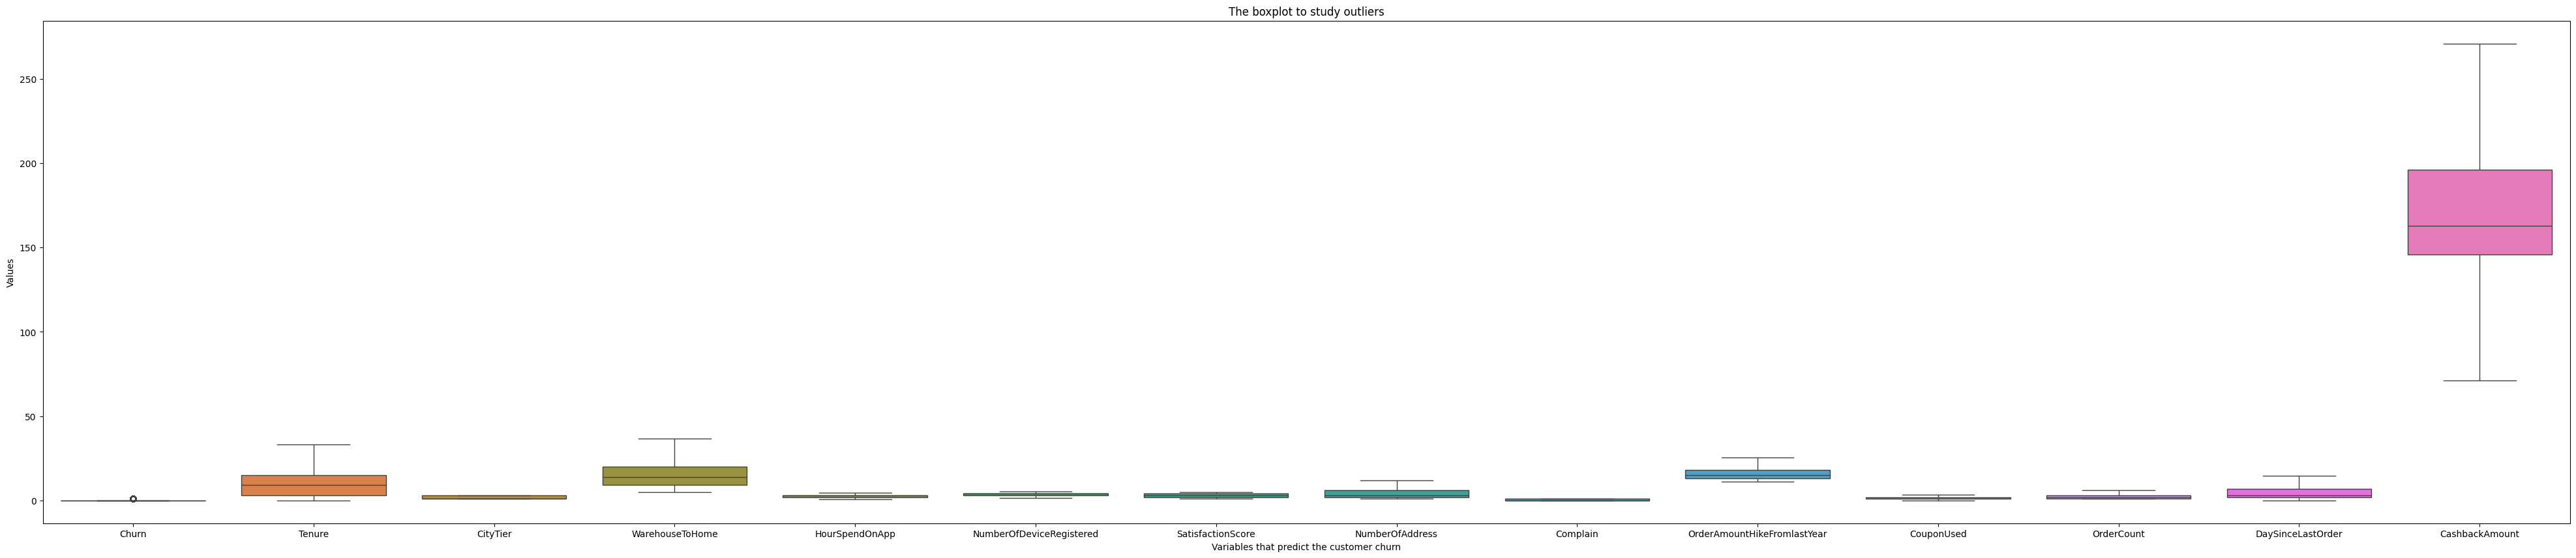

In [ ]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

# Feature Engineering - Adding new variables

In [ ]:
df['avg_cashbk_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [ ]:
Churn_perc = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [ ]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


# Exploratory Data Analysis

# 1. The Univariate Analysis

In [ ]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
num =  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'avg_cashbk_per_order']


In [ ]:
df[cat].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

Churn

Churn
0    4682
1     948
Name: count, dtype: int64


PreferredLoginDevice

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


CityTier

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64


PreferredPaymentMode

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.0,9.0,15.0,33.0
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.0,14.0,20.0,36.5
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.0,3.0,3.0,4.5
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.0,4.0,4.0,5.5
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.0,3.0,4.0,5.0
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.0,3.0,6.0,12.0
Complain,5630.0,0.284902,0.451408,0.000000,0.0,0.0,1.0,1.0
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.0,15.0,18.0,25.5
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.0,1.0,2.0,3.5
OrderCount,5630.0,2.520604,1.711109,1.000000,1.0,2.0,3.0,6.0


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>,
        <Axes: title={'center': 'NumberOfDeviceRegistered'}>],
       [<Axes: title={'center': 'SatisfactionScore'}>,
        <Axes: title={'center': 'NumberOfAddress'}>,
        <Axes: title={'center': 'Complain'}>,
        <Axes: title={'center': 'OrderAmountHikeFromlastYear'}>],
       [<Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>,
        <Axes: title={'center': 'DaySinceLastOrder'}>,
        <Axes: title={'center': 'CashbackAmount'}>],
       [<Axes: title={'center': 'avg_cashbk_per_order'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

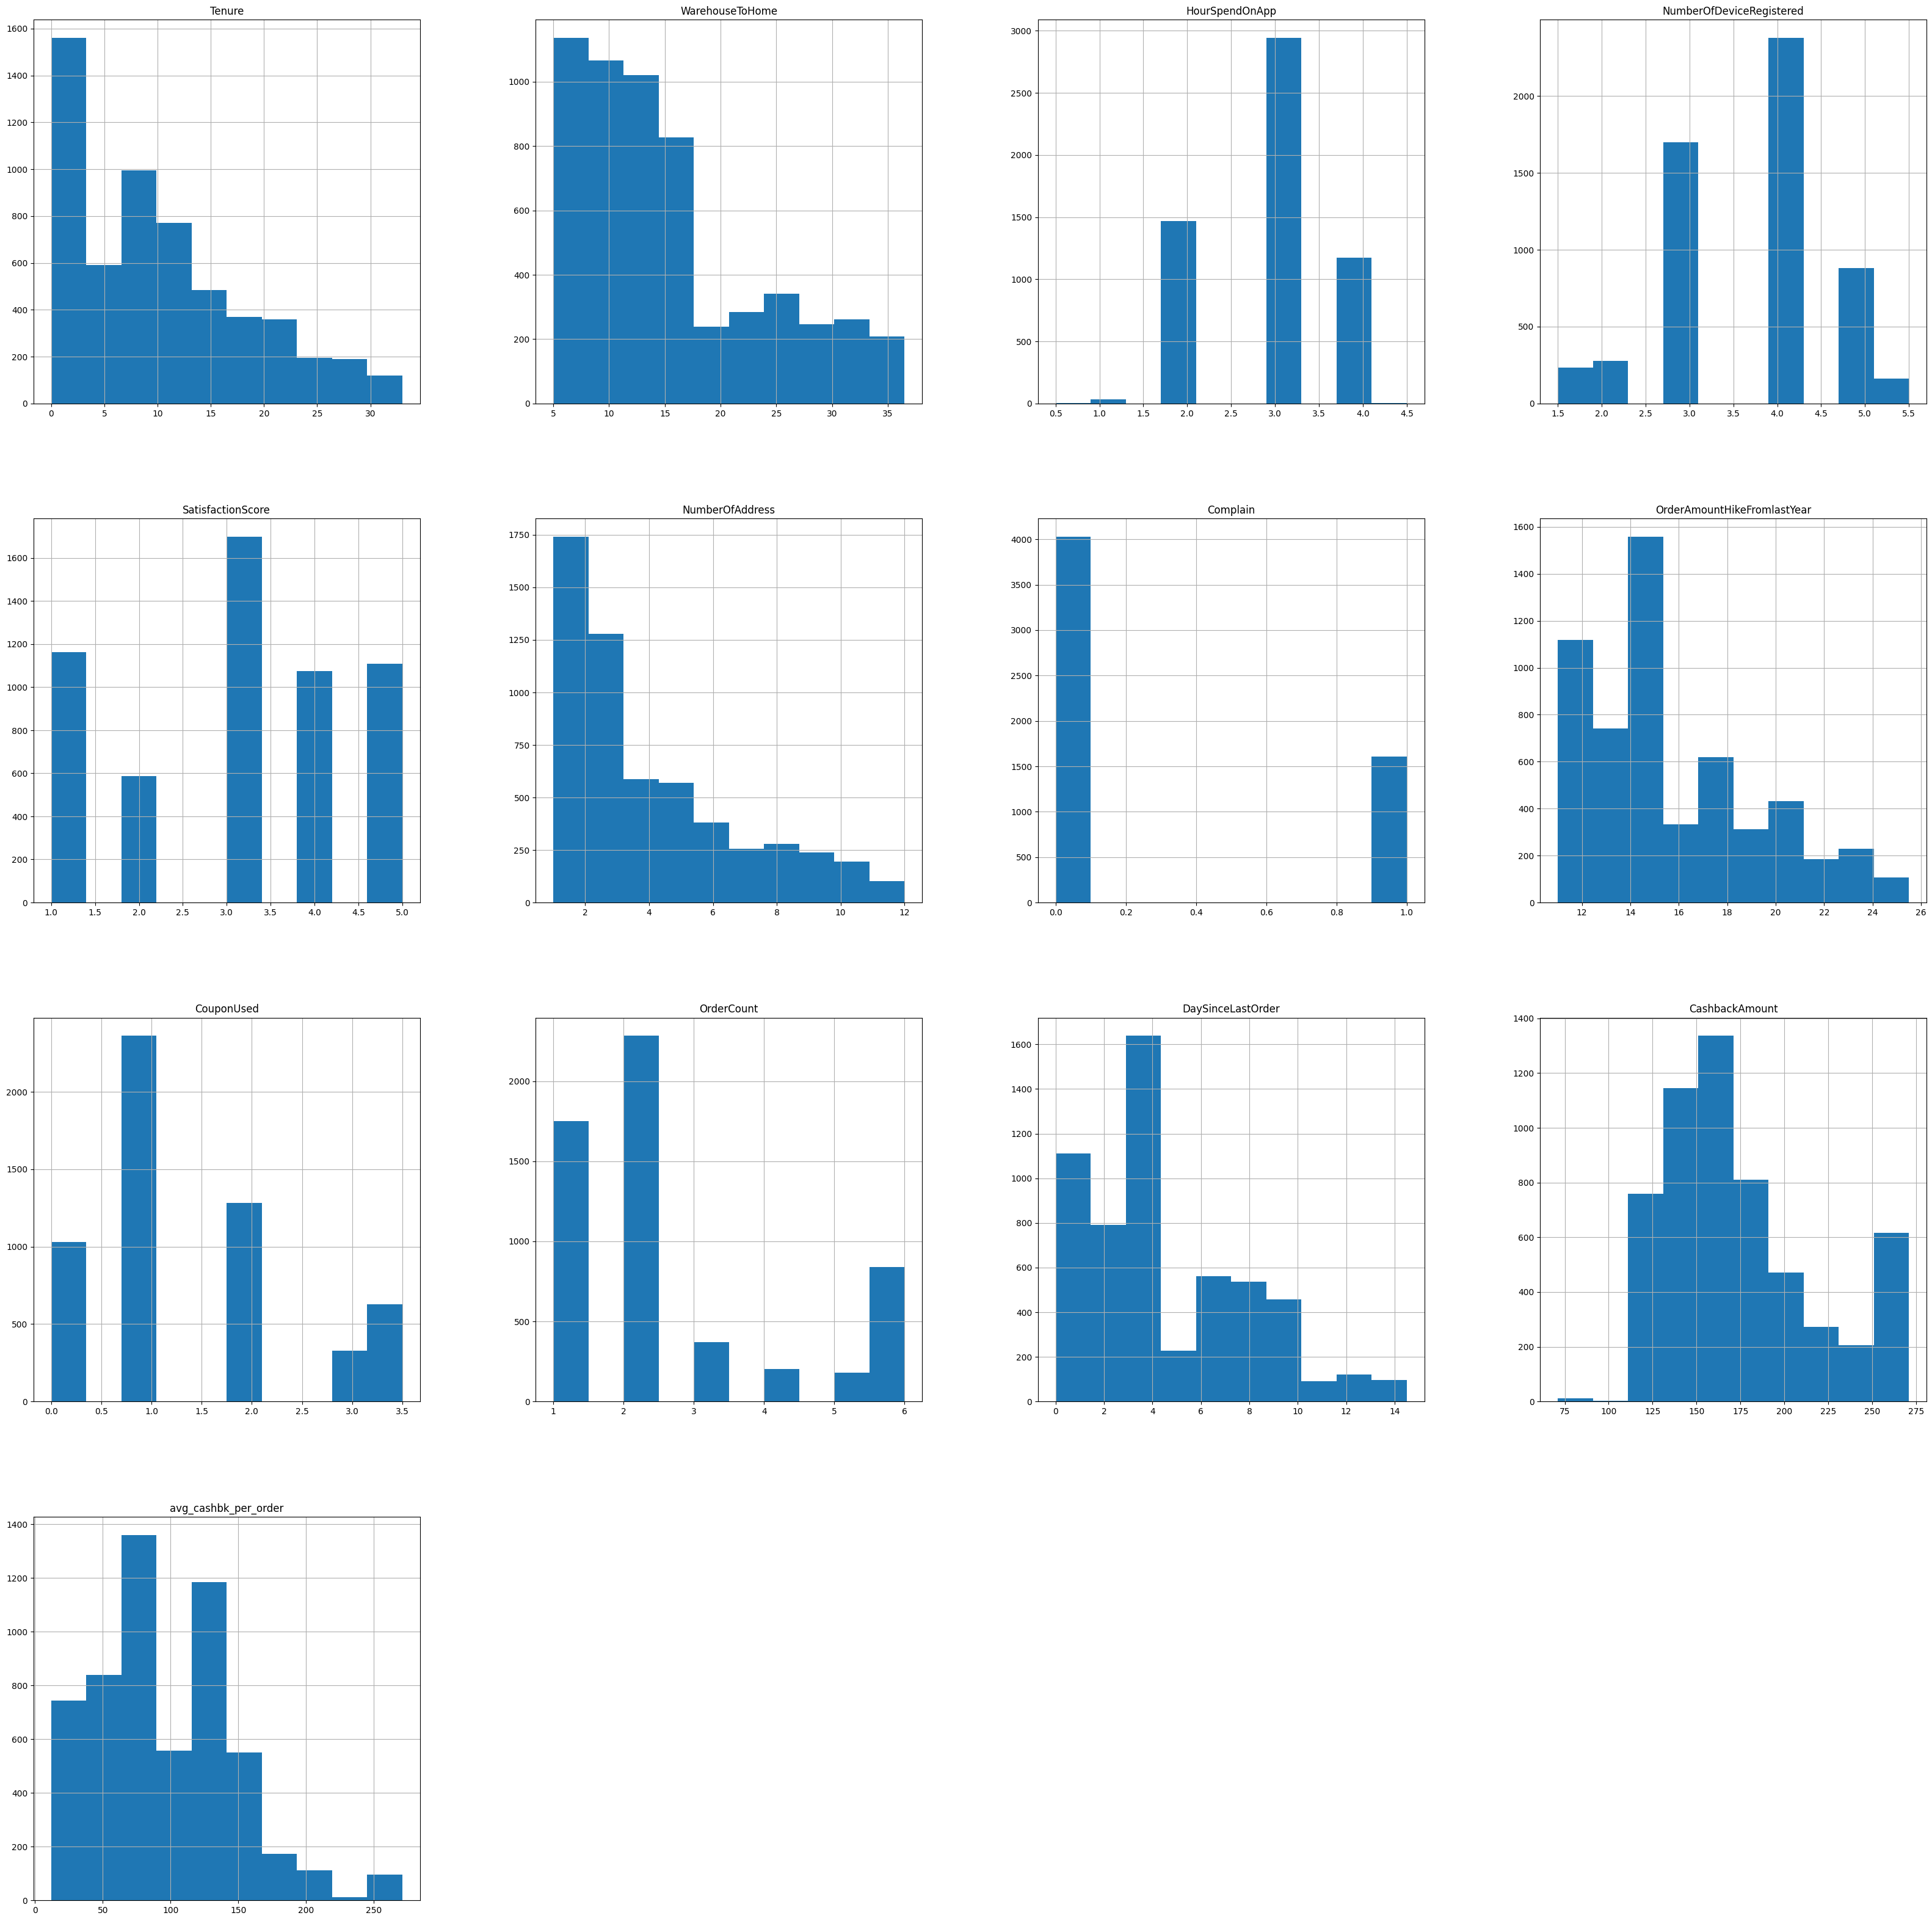

In [ ]:
df[num].hist(figsize=(40,40))

<ipython-input-31-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=subplot)
<ipython-input-31-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], ax=subplot)
<ipython-input-31-79d117302e96>:3: UserWarning: 

`distplot` is a deprecated function and will b

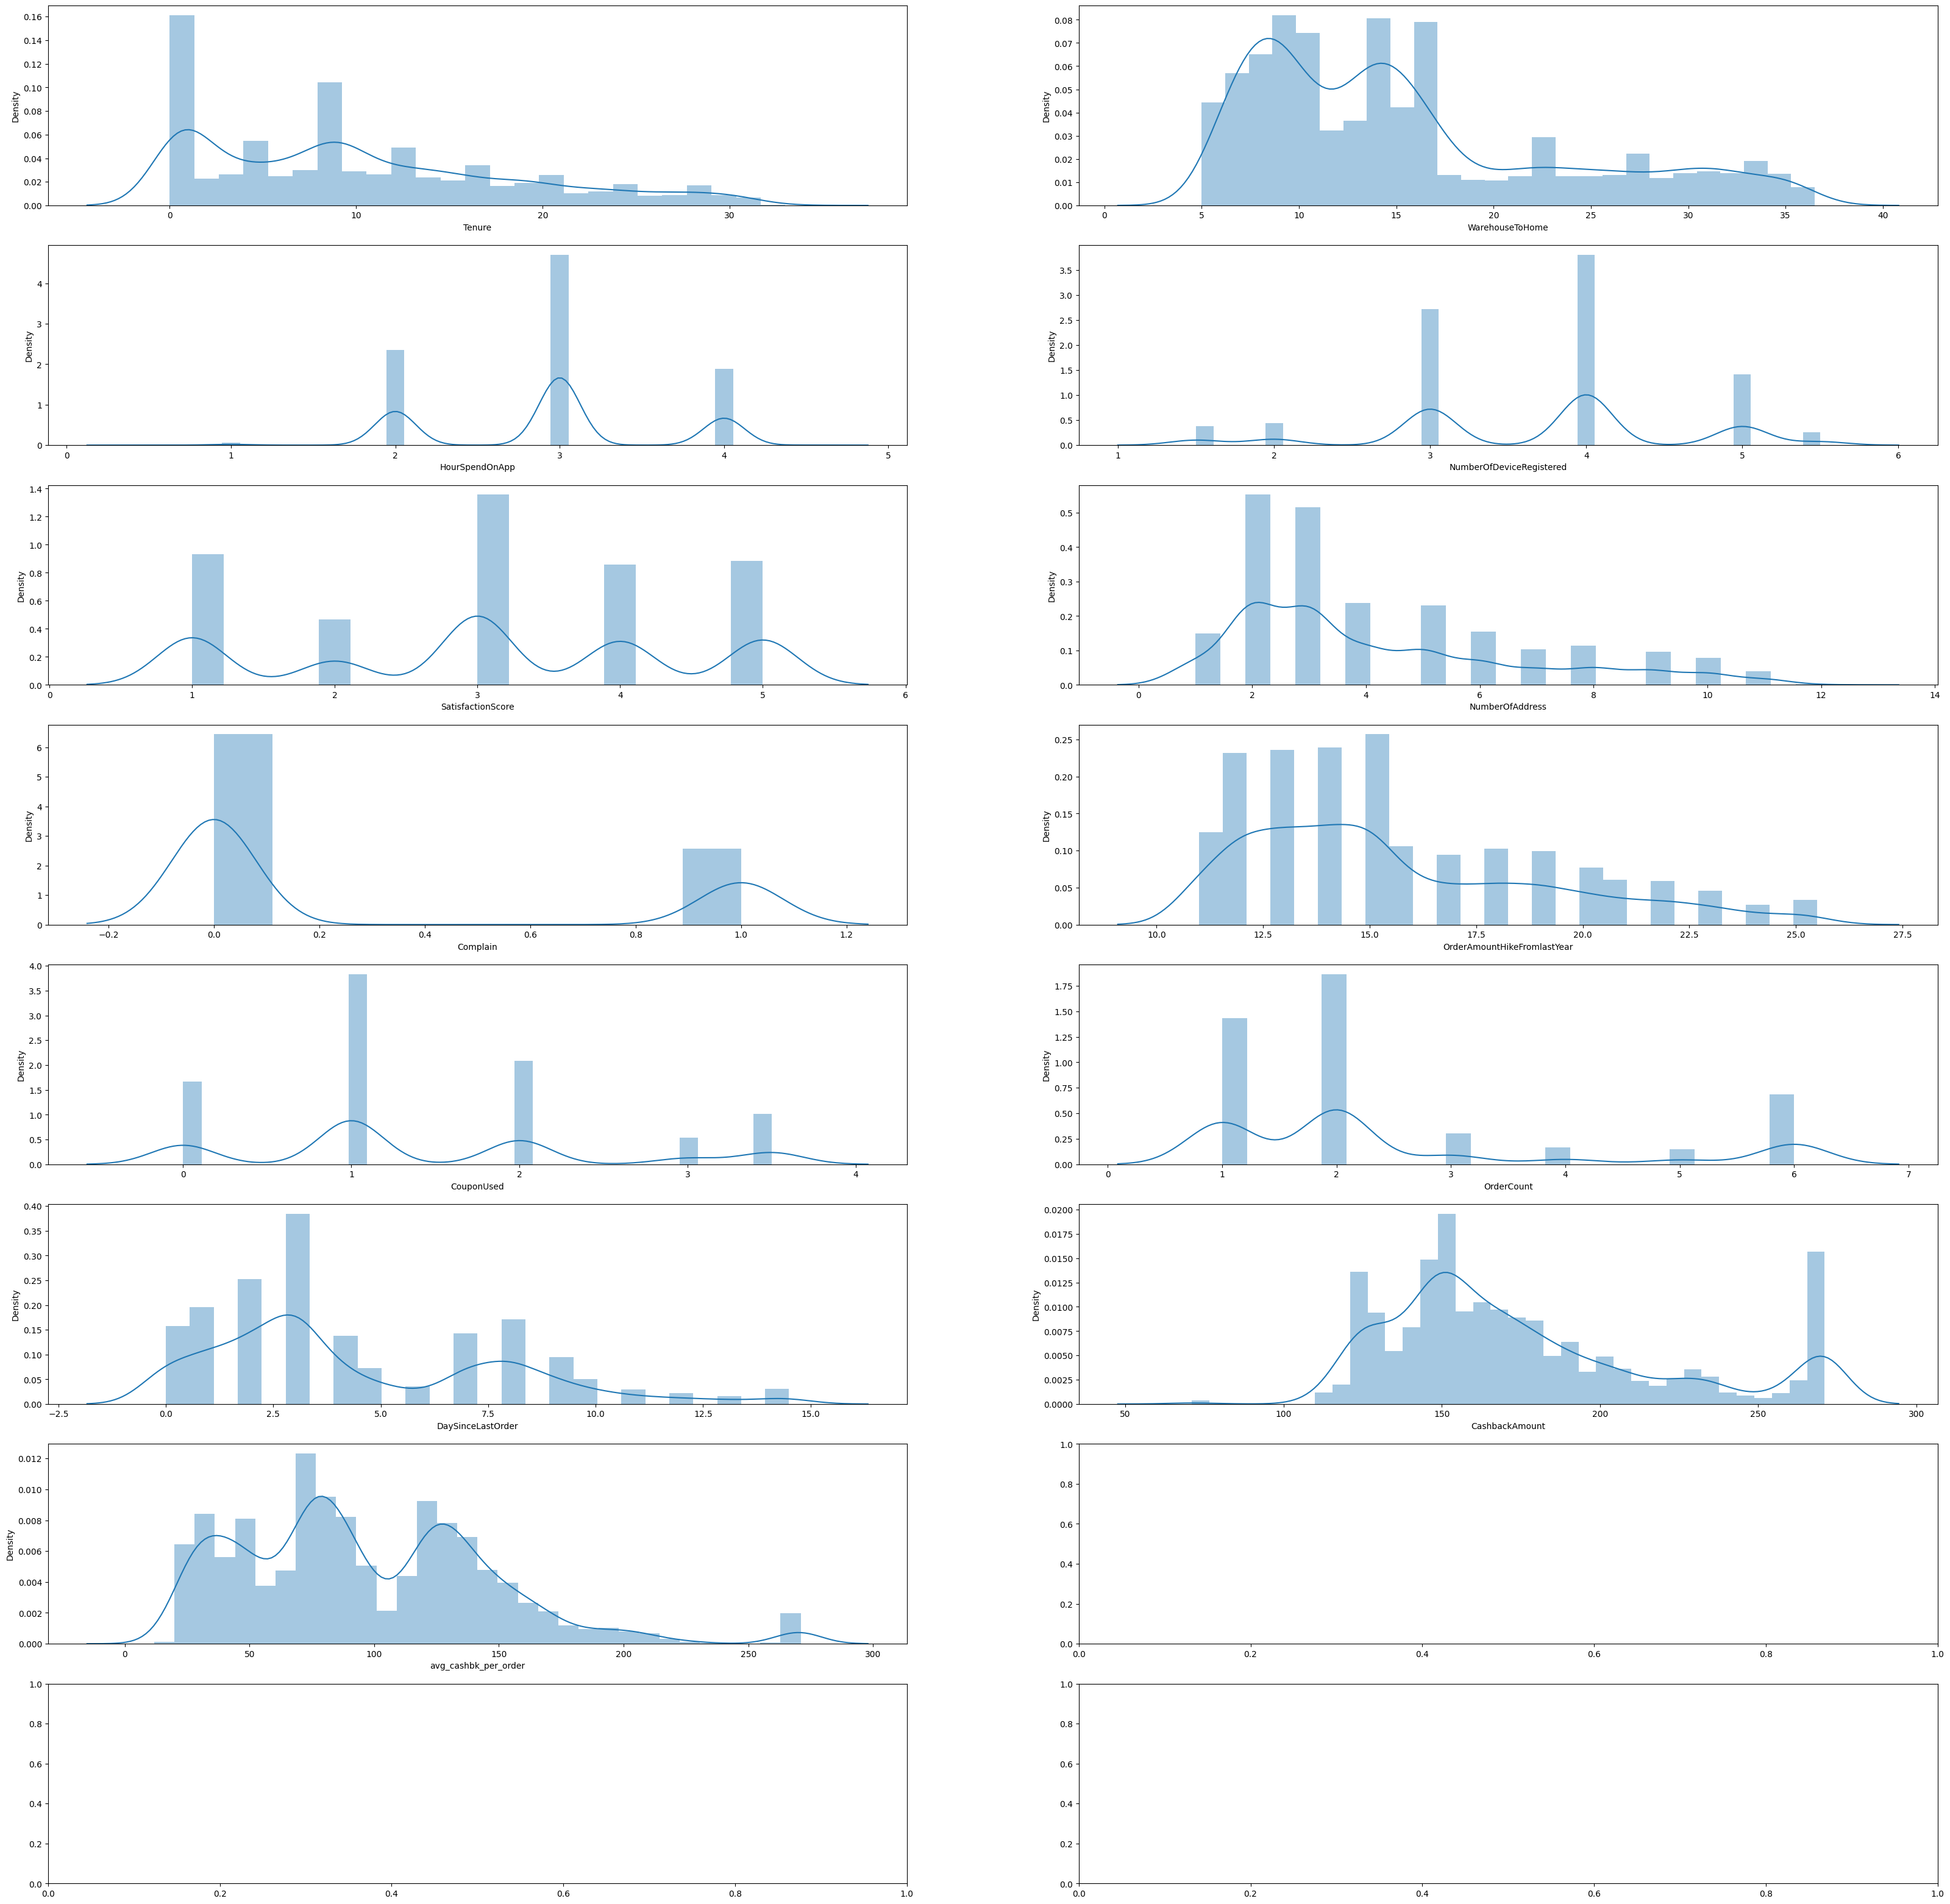

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

# EDA - Univariate Analysis - Analysing Churn by each Variable

In [ ]:
d = {}

# Running loop to calculate and store the values in relevant dataframes
for i in df.columns:
    # Calculate necessary values
    churn_sum = df.groupby(i)['Churn'].sum()
    total_count = df[i].value_counts()
    perc_of_total = round(churn_sum * 100 / total_count, 2)

    # Combine into a single DataFrame
    temp_df = pd.concat([churn_sum, total_count, perc_of_total], axis=1)
    temp_df.columns = ['Customers_churned', 'Total_Customers', 'perc_of_total_cust']

    # Reset index
    temp_df.reset_index(inplace=True)
    temp_df = temp_df.rename(columns={'index': i})

    # Store in dictionary
    d[i] = temp_df


In [ ]:
for i in df.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn Customers_churned  Total_Customers perc_of_total_cust
0      0                 0             4682                0.0
1      1               948              948              100.0

Tenure
    Tenure Customers_churned  Total_Customers perc_of_total_cust
0      0.0               272              508          53.543307
1      1.0               349              690           50.57971
2      2.0                14              167           8.383234
3      3.0                18              195           9.230769
4      4.0                20              203           9.852217
5      5.0                16              204           7.843137
6      6.0                 8              183           4.371585
7      7.0                16              221           7.239819
8      8.0                16              263            6.08365
9      9.0                93              511          18.199609
10    10.0                14              213            6.57277
11    11.0       

# Analysing the Churn by each Variable - Visualising via Graphs



In [ ]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)


In [ ]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

<Figure size 2000x1200 with 0 Axes>

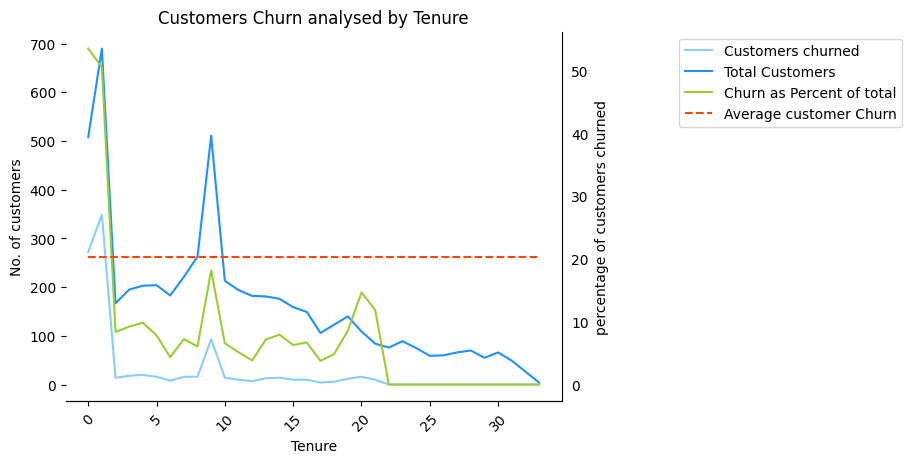

In [ ]:
analysis_chart('Tenure')

<Figure size 2000x1200 with 0 Axes>

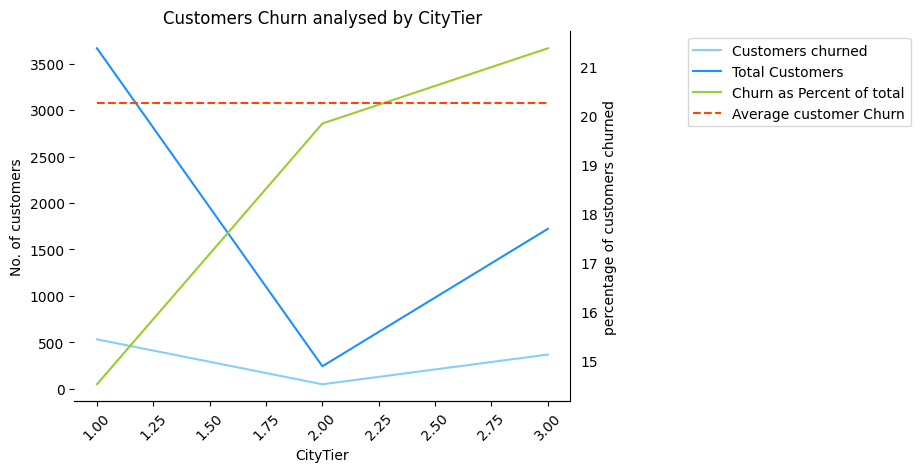

In [ ]:
analysis_chart('CityTier')

<Figure size 2000x1200 with 0 Axes>

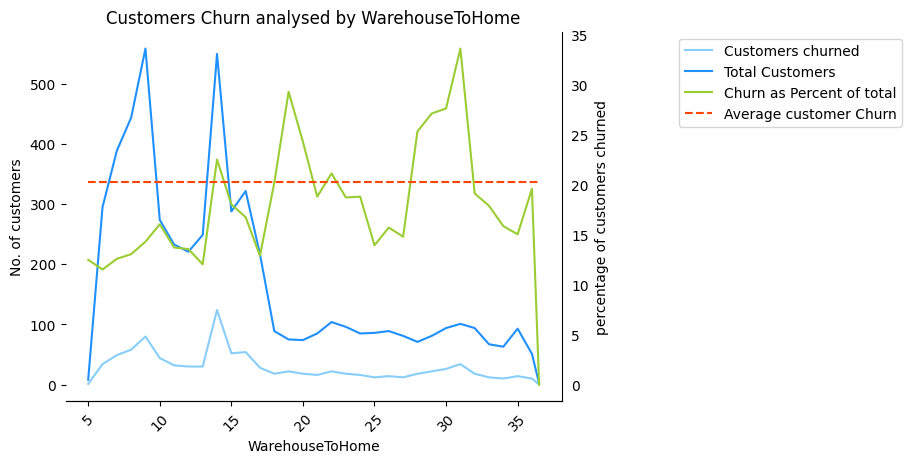

In [ ]:
analysis_chart('WarehouseToHome')

<Figure size 2000x1200 with 0 Axes>

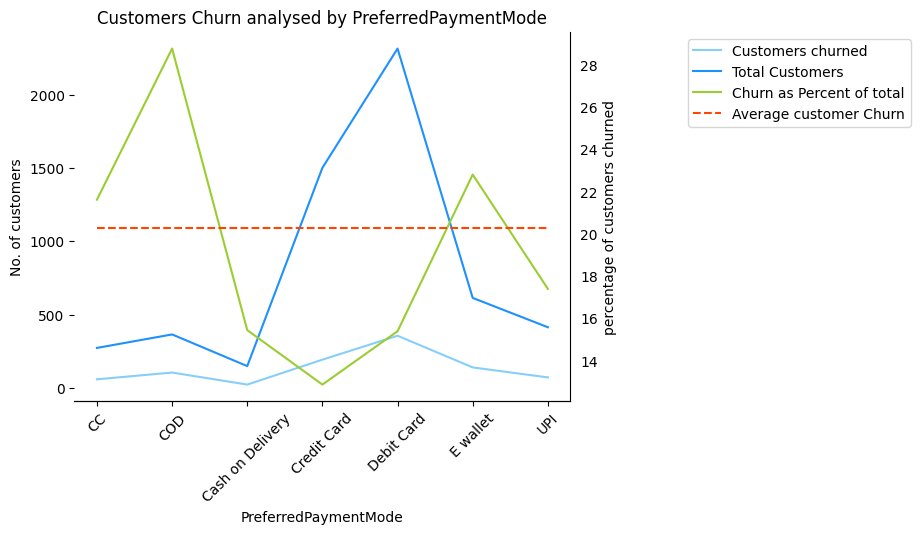

In [ ]:
analysis_chart('PreferredPaymentMode')

<Figure size 2000x1200 with 0 Axes>

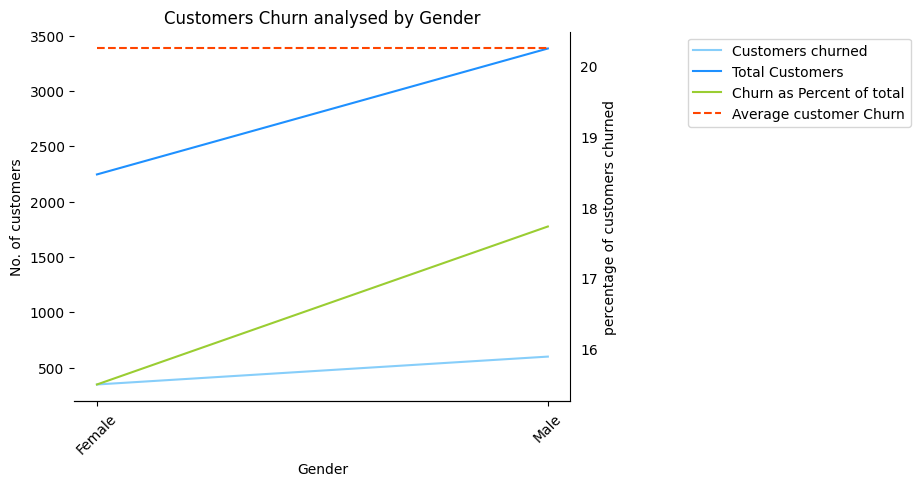

In [ ]:
analysis_chart('Gender')

<Figure size 2000x1200 with 0 Axes>

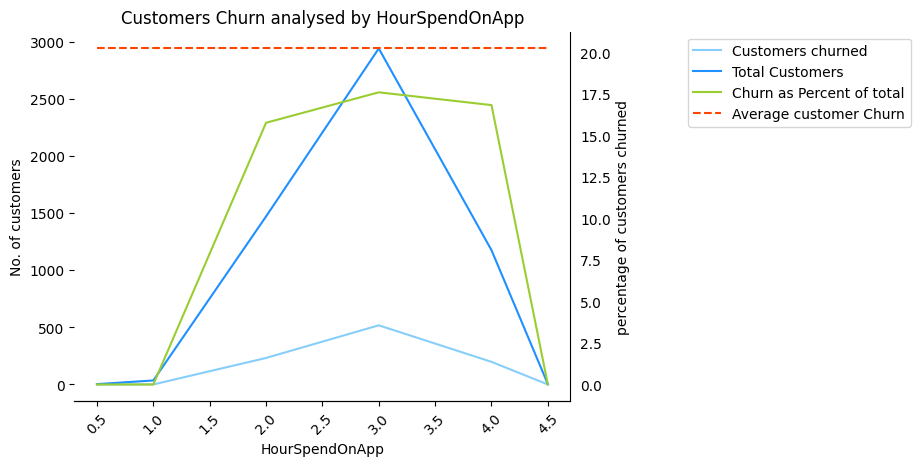

In [ ]:
analysis_chart('HourSpendOnApp')

<Figure size 2000x1200 with 0 Axes>

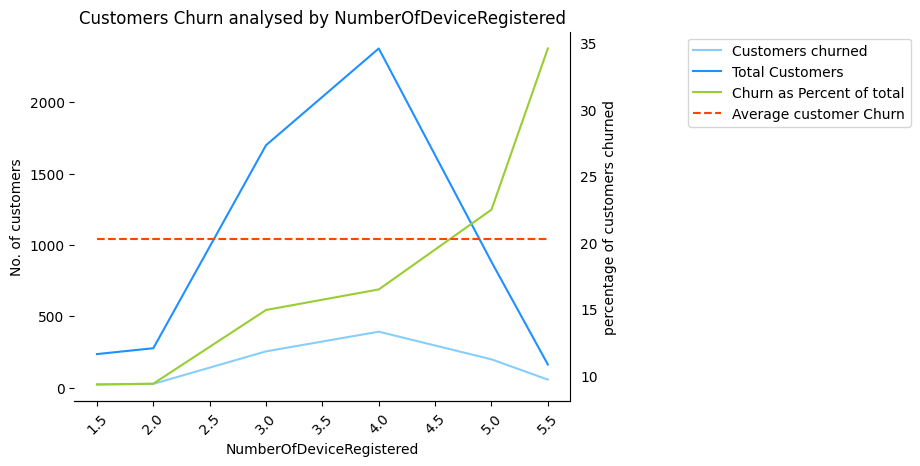

In [ ]:
analysis_chart('NumberOfDeviceRegistered')

<Figure size 2000x1200 with 0 Axes>

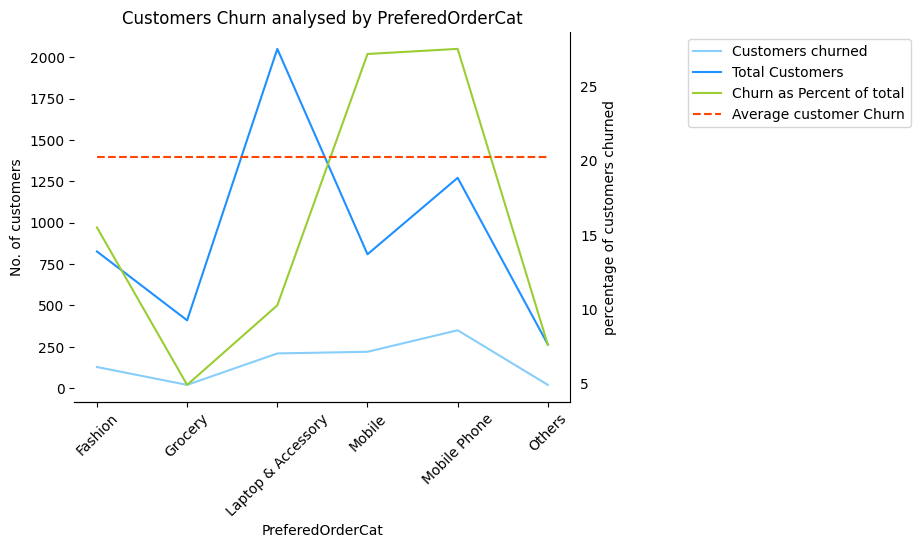

In [ ]:
analysis_chart('PreferedOrderCat')

<Figure size 2000x1200 with 0 Axes>

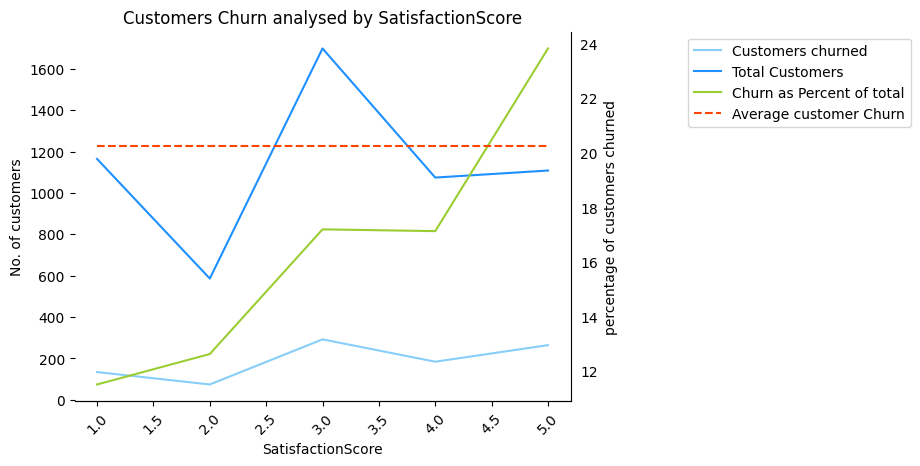

In [ ]:
analysis_chart('SatisfactionScore')

<Figure size 2000x1200 with 0 Axes>

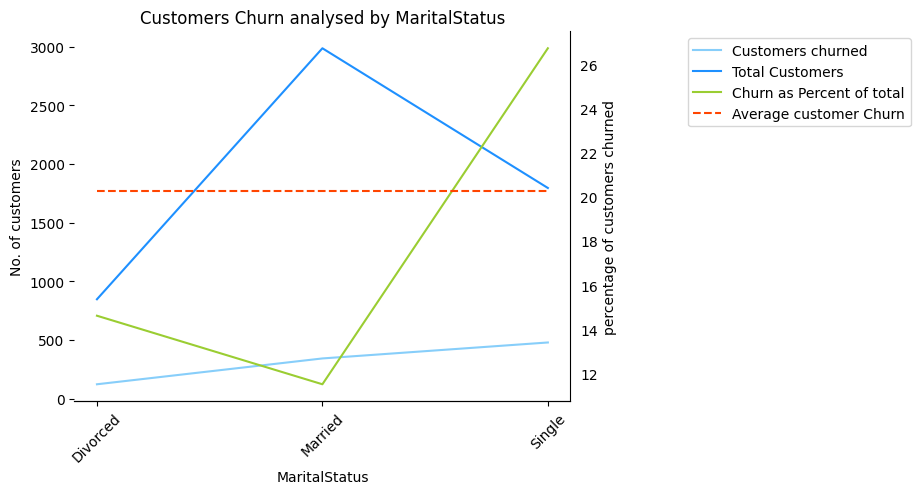

In [ ]:
analysis_chart('MaritalStatus')

<Figure size 2000x1200 with 0 Axes>

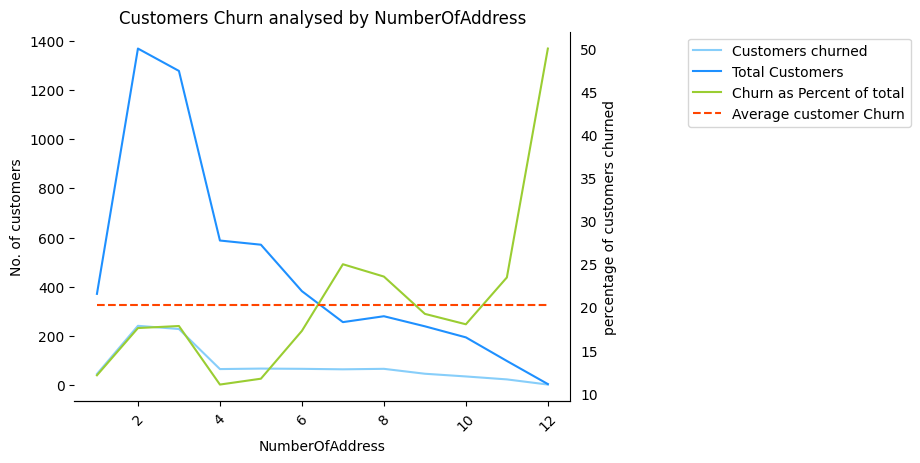

In [ ]:
analysis_chart('NumberOfAddress')

<Figure size 2000x1200 with 0 Axes>

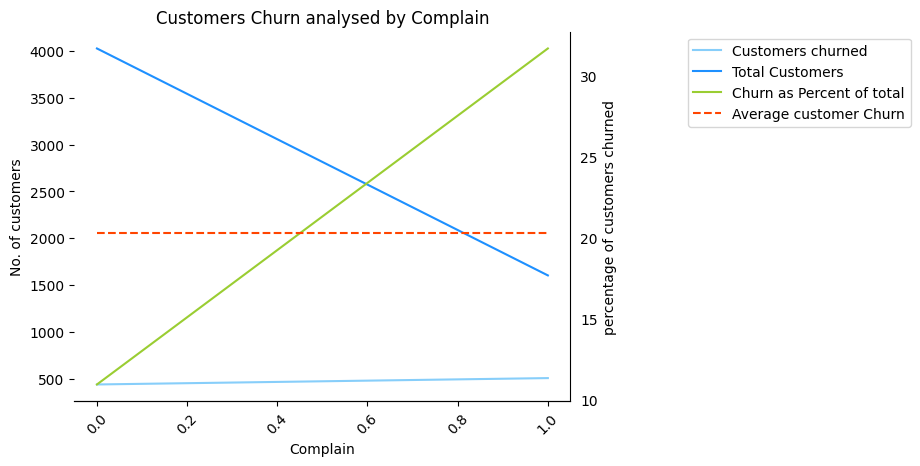

In [ ]:
analysis_chart('Complain')

<Figure size 2000x1200 with 0 Axes>

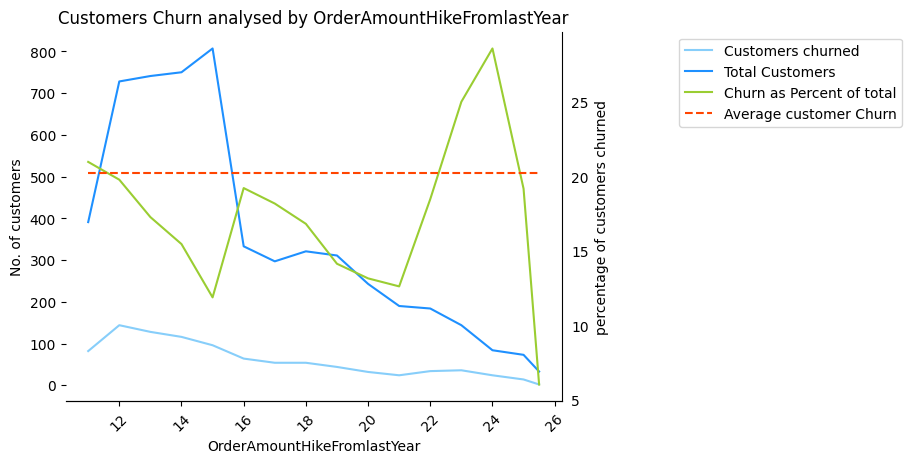

In [ ]:
analysis_chart('OrderAmountHikeFromlastYear')

<Figure size 2000x1200 with 0 Axes>

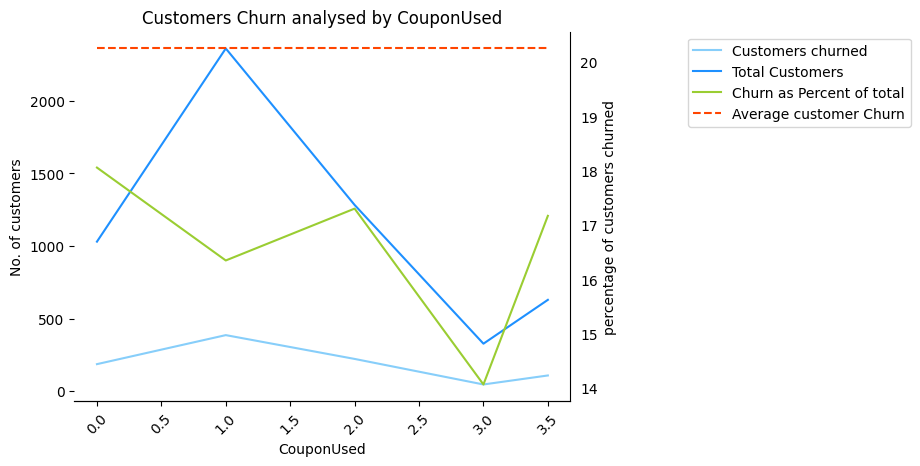

In [ ]:
analysis_chart('CouponUsed')

<Figure size 2000x1200 with 0 Axes>

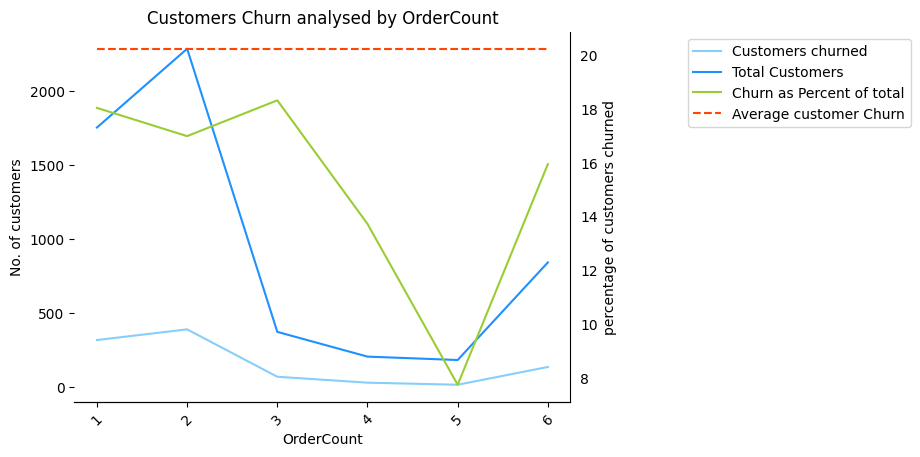

In [ ]:
analysis_chart('OrderCount')

<Figure size 2000x1200 with 0 Axes>

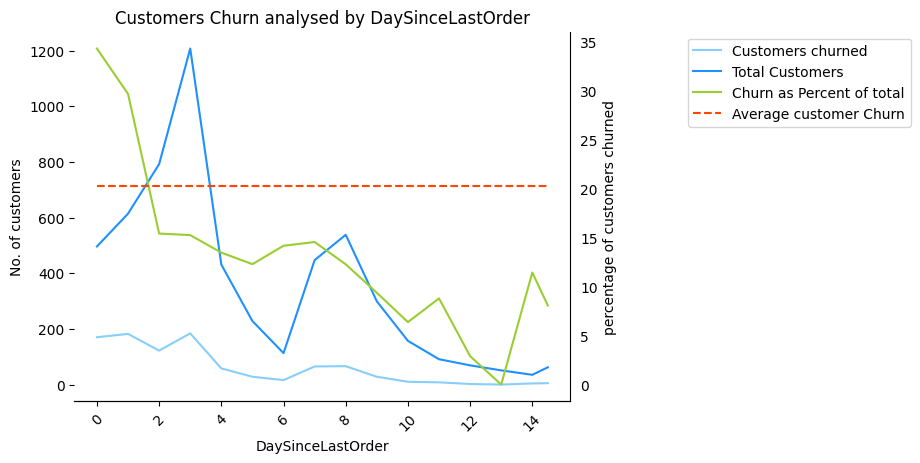

In [ ]:
analysis_chart('DaySinceLastOrder')

<Figure size 2000x1200 with 0 Axes>

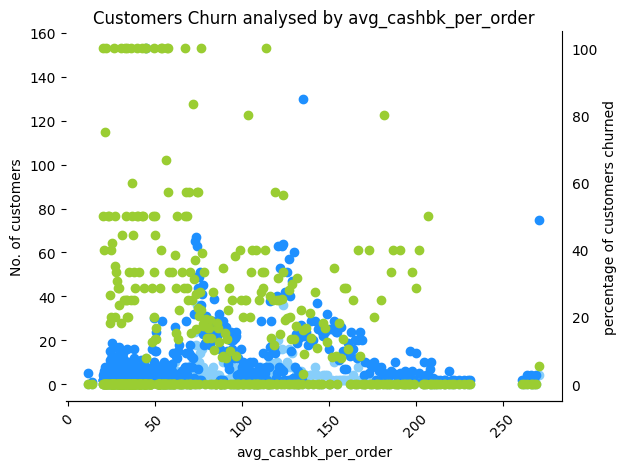

In [ ]:
for i in ['avg_cashbk_per_order']:
    # definig the plot for matplotlib
    plt.figure(figsize=(20,12))
    fig, ax = plt.subplots()
    # defining the title
    title1 = 'Customers Churn analysed by ' + i
    plt.title(title1)
    # defining the lines for the y -axis
    line1 = ax.scatter(d[i][i],d[i]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
    line2 = ax.scatter(d[i][i],d[i]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
    # labelling the x -axis and y-axis
    plt.xlabel (i)
    plt.ylabel ('No. of customers')
    # rotating the labels on the x-axis for better visualisation
    for tick in ax.get_xticklabels():
      tick.set_rotation(45)
    # defining another axis on the right side of the graph
    ax2=ax.twinx()
    # defining the line for the right side y -axis
    line3 = ax2.scatter(d[i][i],d[i]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
    # labelling the right side y-axis
    plt.ylabel ('percentage of customers churned')
    # adding sns palette for better visualisation
    sns.despine(ax=ax, right=True, left=True)
    sns.despine(ax=ax2, left=True, right=False)

# EDA - Bivariate Analysis

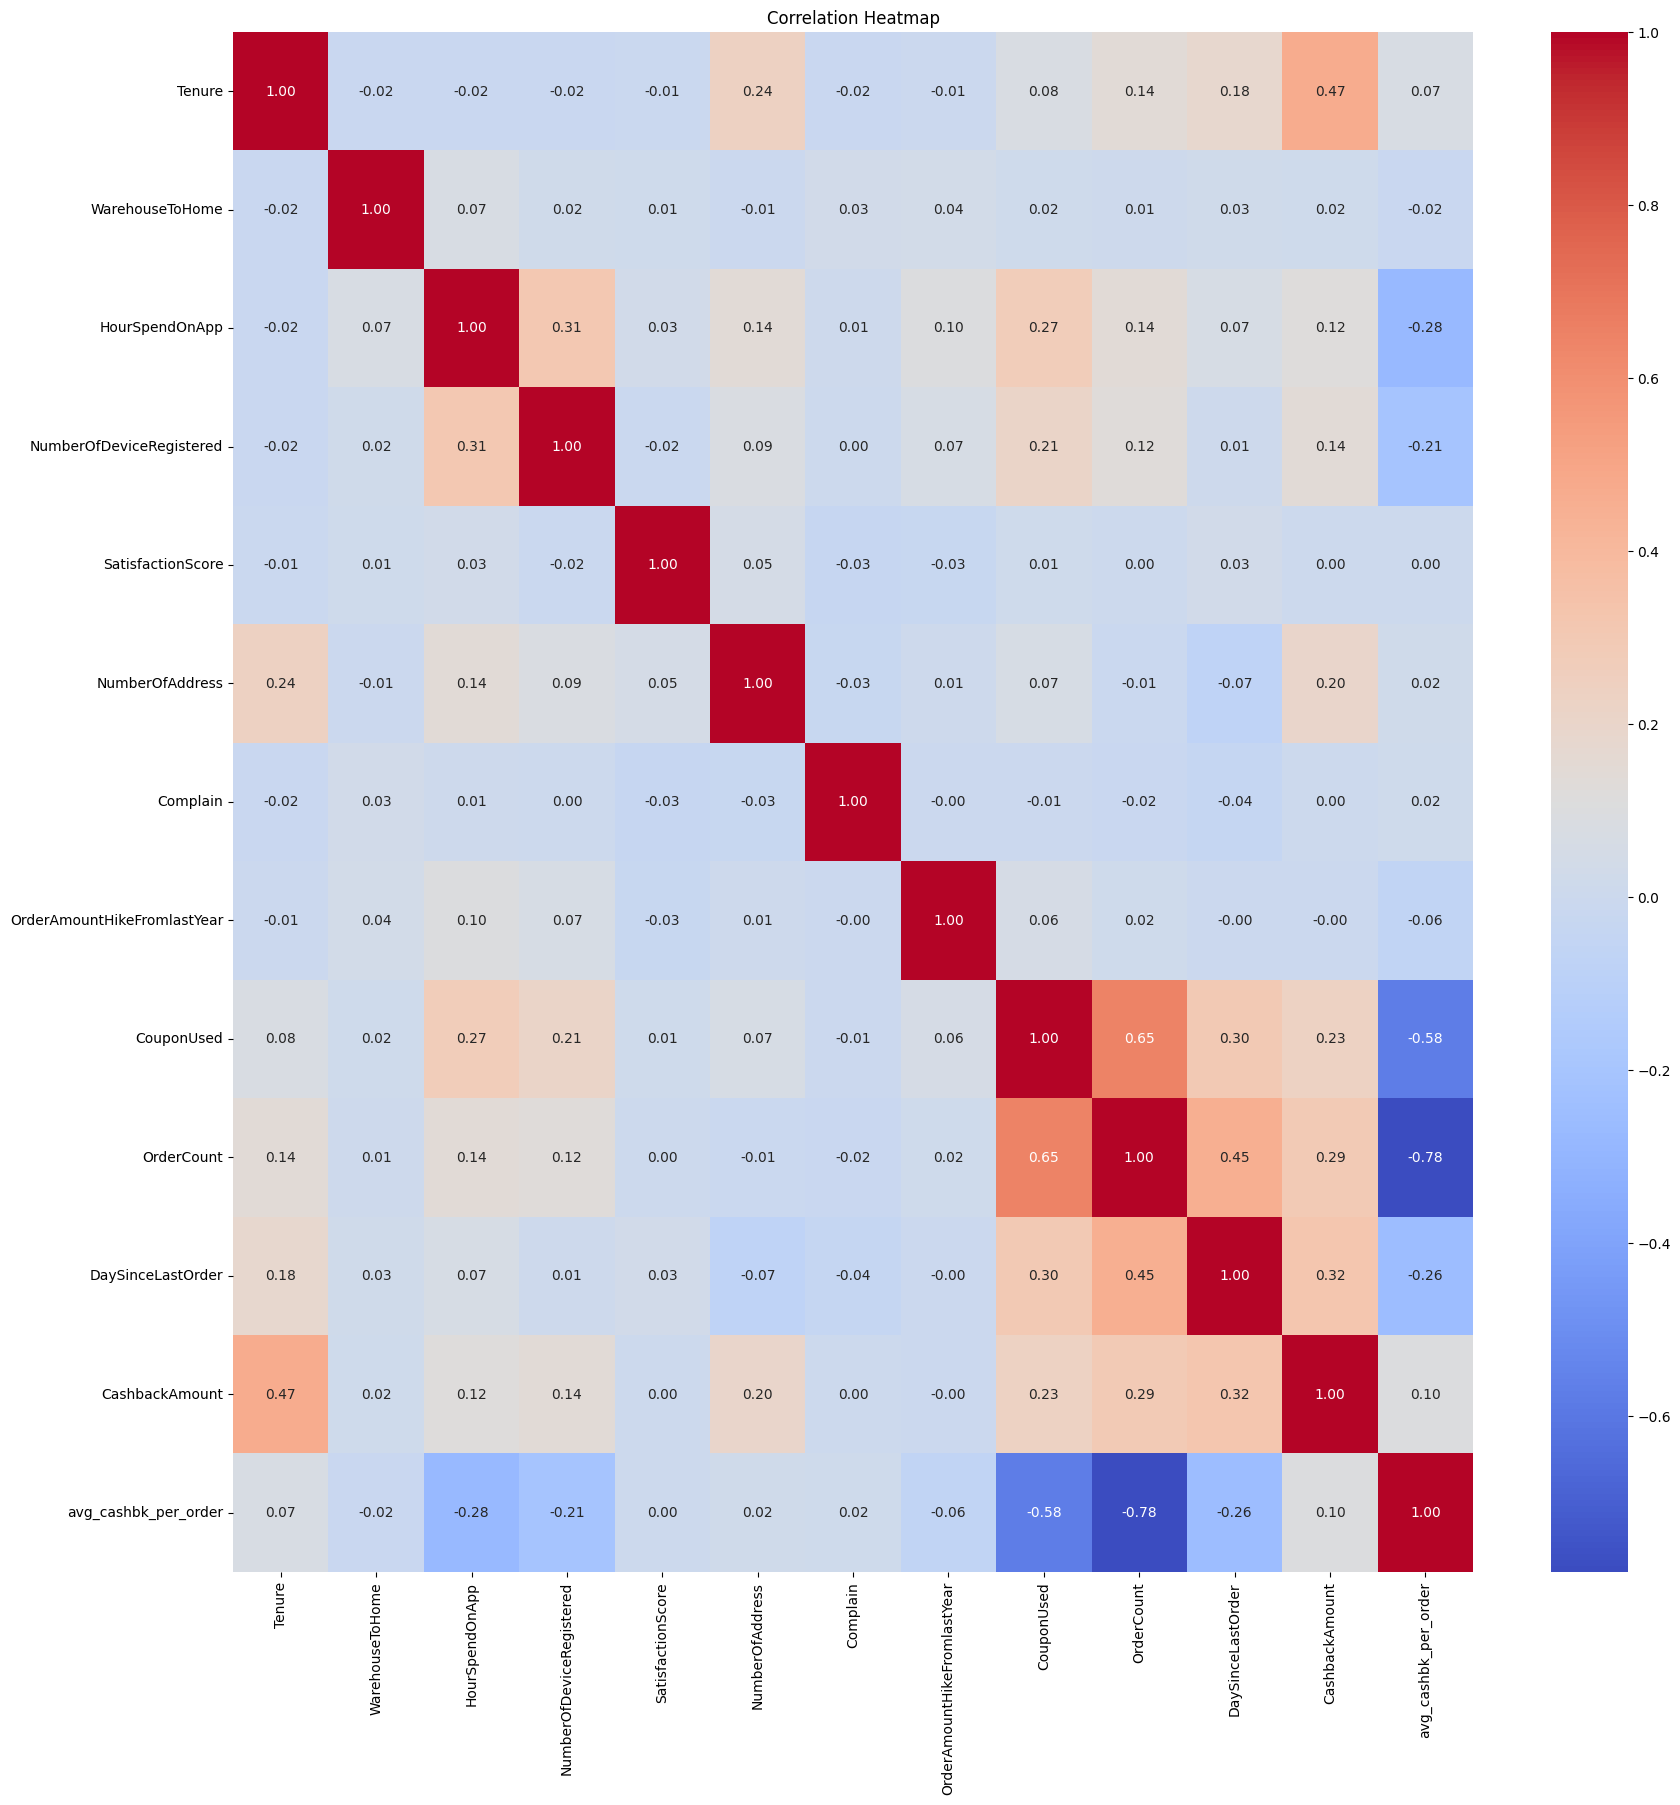

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap of correlations
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# One Hot coding and Scaling of the data

In [ ]:
# prompt: i want to download this corelation image to colad folder

# Assuming the correlation heatmap is the last plot generated (plt.show()).
# Save the figure to the Colab environment.
plt.savefig('correlation_heatmap.png')

# Optionally, you can display the saved image.
from IPython.display import Image
Image('correlation_heatmap.png')

# The image is now saved in your Colab environment as correlation_heatmap.png.
# You can download it from the files tab in the left sidebar of Colab.

## One hot encoding

In [ ]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0,160.0
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0,121.0
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0,120.0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0,134.0
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0,130.0


In [ ]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0,160.0
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0,121.0
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0,120.0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0,134.0
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0,130.0


In [ ]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [ ]:
df_encoded.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,False,False,False,False,True,False,False,False,False,True
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,False,True,True,False,False,True,False,False,False,True
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,False,False,True,False,False,True,False,False,False,True
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,False,False,True,False,True,False,False,False,False,True
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,False,False,True,False,False,True,False,False,False,True
5,0.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,3.5,6.0,...,False,False,False,False,False,False,True,False,False,True
6,9.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,1.0,...,False,False,True,False,True,False,False,False,False,False
7,9.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,2.0,...,False,False,True,False,False,True,False,False,False,False
8,13.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,1.0,...,True,False,True,False,False,True,False,False,False,False
9,9.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,...,False,False,True,False,False,True,False,False,False,True


###Scaling the data

In [ ]:
#importing StandardScaler from SciKit Learn
from sklearn.preprocessing import StandardScaler

In [ ]:
#defining a function standard scaler that will scale the the dataframe
scaler = StandardScaler()

In [ ]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [ ]:
scaled_df_encoded = df_encoded.copy()

In [ ]:
scaled_df_encoded[num] = features

In [ ]:
#checking the how does the scaled df looks like
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,False,False,False,False,True,False,False,False,False,True
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,False,True,True,False,False,True,False,False,False,True
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,False,False,True,False,False,True,False,False,False,True
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,False,False,True,False,True,False,False,False,False,True
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,False,False,True,False,False,False,False,False,True,False
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,False,False,True,False,True,False,False,False,True,False


# Hierarchical Clustering

In [ ]:
scaled_df_encoded_h = scaled_df_encoded.copy()

### Creating the Dendrogram - Importing dendrogram and linkage module

importing libraries - dendogram and linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#linking using the average linking method
link_method=linkage(scaled_df_encoded_h,method = 'average')

In [ ]:
# just checking what do we get in the Link_method variable
link_method

array([[1.00000000e+00, 1.34700000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.35900000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.39500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.08290000e+04, 1.12540000e+04, 6.27570474e+00, 1.02000000e+02],
       [1.12550000e+04, 1.12560000e+04, 6.29538596e+00, 5.51700000e+03],
       [1.12510000e+04, 1.12570000e+04, 6.55057975e+00, 5.63000000e+03]])

selecting the target variable or label

In [ ]:
labellist = np.array(scaled_df_encoded_h.Churn_1)
labellist

array([ True,  True,  True, ..., False, False, False])

In [ ]:
len(labellist)

5630

creating the dendrogram

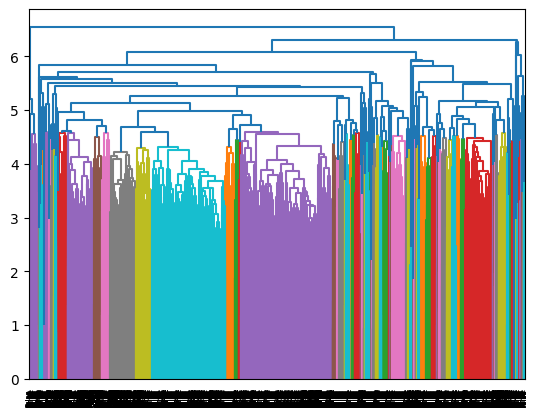

In [ ]:
dend = dendrogram(link_method,labels=labellist)

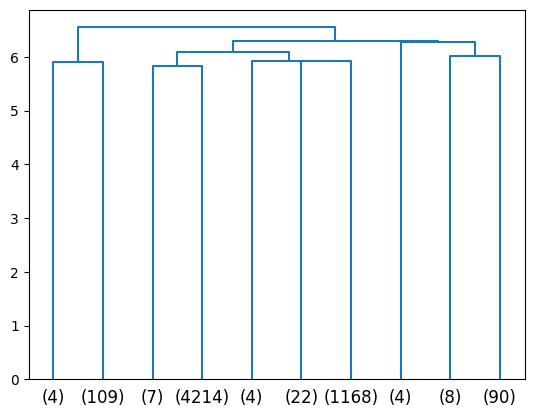

In [ ]:
# truncate mode = lastp means last 10 dendrograms to stay and rest to go.
dend = dendrogram(link_method,
                  labels=labellist,
                 truncate_mode='lastp',
                 p=10)

### importing fcluster to create clusters

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
# criterion= maxclust, clusters=4
clusters_max = fcluster(link_method,4,criterion = 'maxclust')
clusters_max

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
#appending the clusters to the dataframe
scaled_df_encoded_h['clusters_max'] = clusters_max

In [ ]:
scaled_df_encoded_h.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,clusters_max
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,False,False,False,True,False,False,False,False,True,2
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,True,True,False,False,True,False,False,False,True,2
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,False,True,False,False,True,False,False,False,True,2
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,False,True,False,True,False,False,False,False,True,2
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,True,False,False,True,False,False,False,True,2


In [ ]:
df_h = df.copy()

In [ ]:
df_h['clusters_max'] = clusters_max

### Cluster Profiles

In [ ]:
aggdata_max = scaled_df_encoded_h.iloc[:,:].groupby('clusters_max').median()
aggdata_max['freq'] = scaled_df_encoded_h.clusters_max.value_counts().sort_index()
aggdata_max
# 4 clusters in the maxcluster method

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
clusters_max,,,,,,,,,,,,,,,,,,,,,
1,1.071320,-0.560642,-1.328053,-0.738345,-0.048392,-0.081410,-0.631198,-0.466620,-0.411136,-0.888745,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113
2,-0.134866,-0.189750,0.092878,0.323303,-0.048392,-0.472817,-0.631198,-0.187486,-0.411136,-0.304276,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5415
3,1.252248,-0.746088,-0.617588,-0.207521,-0.048392,2.462737,1.584290,-0.885322,-0.411136,0.864660,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
4,1.553794,1.911971,0.092878,-0.738345,-0.772992,-0.081410,1.584290,0.091648,-0.411136,-0.304276,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,98


In [ ]:
# Select only numeric columns for aggregation
numeric_columns = df_h.select_dtypes(include=['number']).columns

# Compute mean only for numeric columns
aggdata_max_2 = df_h.groupby('clusters_max')[numeric_columns].mean()

# Add frequency count
aggdata_max_2['freq'] = df_h['clusters_max'].value_counts().sort_index()

aggdata_max_2


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,clusters_max,freq
clusters_max,,,,,,,,,,,,,,,
1,18.637168,13.911504,2.389381,3.287611,2.796460,4.415929,0.407080,14.986726,0.769912,1.044248,3.566372,258.000000,252.353982,1.0,113
2,9.737581,15.310619,2.946260,3.713666,3.084765,4.205725,0.273684,15.670545,1.453093,2.549215,4.371745,172.399446,92.755035,2.0,5415
3,20.500000,9.500000,2.500000,3.500000,3.000000,10.500000,1.000000,12.500000,1.625000,4.000000,13.500000,250.500000,81.416667,3.0,4
4,20.897959,30.040816,2.938776,3.168367,2.387755,3.836735,0.734694,16.653061,1.505102,2.581633,8.224490,232.867347,110.417177,4.0,98


# K means Clustering

In [ ]:
scaled_df_encoded_k= scaled_df_encoded.copy()

### Importing the KMeans from sklearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters = 2)

In [ ]:
k_means.fit(scaled_df_encoded_k)

KMeans(n_clusters=2)

In [ ]:
k_means.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
k_means.inertia_

77889.1765981773

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

71770.83296332211

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

67751.06644886534

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

65796.67435429634

In [ ]:
wss =[]
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df_encoded_k)
    wss.append(k_means.inertia_)

In [ ]:
wss

[89242.39982238012,
 77889.05059049829,
 73106.39038214763,
 67750.84227759433,
 65591.5873946039,
 64026.45216613735,
 62728.88928863377,
 61303.15408387008,
 59933.970816912406,
 58577.10309712455,
 58033.571289199506,
 56831.39576135214,
 56186.55399720362,
 55612.755920580166,
 55294.416441238194,
 54248.44164038328,
 53971.52041077584,
 53277.272212783166,
 52801.75964119569]

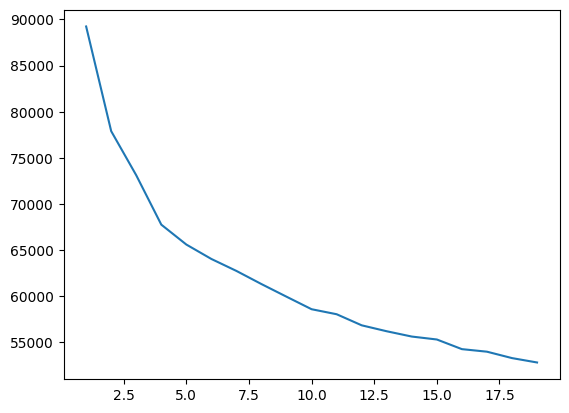

In [ ]:
plt.plot(range(1,20), wss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_df_encoded_k)
  labels = k_means.labels_
  ss = silhouette_score(scaled_df_encoded_k,labels)
  Sil_Score.append(ss)

In [ ]:
Sil_Score

[0.14181820832626738,
 0.10088637682256558,
 0.1015305020103996,
 0.0822310747171655,
 0.08337145959489513,
 0.08389943763643405,
 0.08122835946430287,
 0.07004772144553584,
 0.06962343298486148,
 0.07275550623462111,
 0.07246031439421635,
 0.06840684498338304,
 0.06469285919853365,
 0.0663230246568934,
 0.06788821765232028,
 0.07052948177149132,
 0.06702888754517838,
 0.06819838836269032]

In [ ]:
# taking ideal number of clusters as 4
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
labels = k_means.labels_

In [ ]:
scaled_df_encoded_k["Clus_kmeans"] = labels
scaled_df_encoded_k.head(10)

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Clus_kmeans
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,False,False,False,True,False,False,False,False,True,3
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,True,True,False,False,True,False,False,False,True,3
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,False,True,False,False,True,False,False,False,True,3
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,False,True,False,True,False,False,False,False,True,3
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,True,False,False,True,False,False,False,True,3
5,-1.220433,0.799295,0.092878,1.384951,1.400807,-0.864224,1.584290,1.766454,1.922695,2.033597,...,False,False,False,False,False,True,False,False,True,0
6,-0.134866,-0.560642,-1.328053,-0.738345,-0.772992,-0.081410,-0.631198,-0.466620,-1.344668,-0.888745,...,False,True,False,True,False,False,False,False,False,3
7,-0.134866,-1.178795,0.092878,-0.738345,-0.772992,-0.472817,1.584290,0.091648,0.522397,-0.304276,...,False,True,False,False,True,False,False,False,False,3
8,0.347609,-0.807903,0.092878,0.323303,-0.048392,-0.864224,1.584290,-0.466620,-1.344668,-0.888745,...,False,True,False,False,True,False,False,False,False,3
9,-0.134866,1.911971,-1.328053,1.384951,-0.048392,-0.864224,-0.631198,-1.024889,-0.411136,-0.888745,...,False,True,False,False,True,False,False,False,True,3


In [ ]:
aggdata_k = scaled_df_encoded_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k['freq'] = scaled_df_encoded_k.Clus_kmeans.value_counts().sort_index()
aggdata_k

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.208186,-0.010427,0.026788,0.008283,0.005282,-0.166029,-0.052995,-0.024718,1.143545,1.732049,...,0.068906,0.578811,0.100775,0.403962,0.058570,0.100775,0.090439,0.572782,0.260121,1161
1,1.266320,0.026604,-0.147587,-0.045552,-0.007518,0.426416,0.084575,-0.121997,-0.118509,-0.308023,...,0.069231,0.550000,0.373077,0.094872,0.000000,0.003846,0.203846,0.574359,0.239744,780
2,-0.347515,0.074337,0.685317,0.588141,0.006501,0.188847,0.005395,0.183485,0.137719,-0.181247,...,0.073052,0.614177,0.000000,0.401515,0.017316,0.497835,0.000000,0.505952,0.354978,1848
3,-0.318971,-0.079315,-0.642286,-0.576301,-0.006672,-0.265527,-0.007828,-0.116906,-0.809192,-0.779851,...,0.078762,0.623574,0.001086,0.415535,0.385117,0.125475,0.000000,0.509506,0.353612,1841


In [ ]:
df_k = df.copy()

In [ ]:
df_k['Clus_kmeans'] = scaled_df_encoded_k["Clus_kmeans"]

In [ ]:
# Select only numeric columns for aggregation
numeric_columns_k = df_k.select_dtypes(include=['number']).columns

# Compute mean only for numeric columns
aggdata_k2 = df_k.groupby('Clus_kmeans')[numeric_columns_k].mean()

# Add frequency count
aggdata_k2['freq'] = df_k['Clus_kmeans'].value_counts().sort_index()

aggdata_k2


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,avg_cashbk_per_order,Clus_kmeans,freq
Clus_kmeans,,,,,,,,,,,,,,,
0,11.844100,15.450474,2.953488,3.703273,3.074074,3.783807,0.260982,15.583118,2.665375,5.484065,7.664083,191.916451,36.392435,0.0,1161
1,20.616667,15.750000,2.830769,3.652564,3.056410,5.297436,0.323077,15.234615,1.313462,1.993590,5.456410,241.434615,141.727179,1.0,780
2,7.237013,16.136093,3.416937,4.249459,3.075758,4.690476,0.287338,16.329004,1.587933,2.210498,3.534632,167.654762,79.162680,2.0,1848
3,7.473656,14.893265,2.482618,3.152634,3.057577,3.529603,0.281369,15.252852,0.573601,1.186312,2.851711,144.247691,131.906364,3.0,1841


# Building Classification models

Here since we have a scaled & encoded dataframe, along with the clusters. lets use that dataframe

In [ ]:
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,False,False,False,False,True,False,False,False,False,True
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,False,True,True,False,False,True,False,False,False,True
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,False,False,True,False,False,True,False,False,False,True
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,False,False,True,False,True,False,False,False,False,True
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,False,False,True,False,False,False,False,False,True,False
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,False,False,True,False,True,False,False,False,True,False
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,False,False,True,False,True,False,False,False,True,False


In [ ]:
scaled_df_encoded_h['clusters_max'] = scaled_df_encoded_h['clusters_max'].astype('object')

In [ ]:
scaled_df_encoded_h1 = pd.get_dummies(scaled_df_encoded_h, drop_first=True)

## Correcting the imbalanced data with the help of SMOTE oversampling

In [ ]:
X=scaled_df_encoded_h1.drop(['Churn_1'],axis=1)
y=scaled_df_encoded_h1['Churn_1']

In [ ]:
print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 34)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())


<ipython-input-107-935c5ae427b6>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not de

In [ ]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (9364, 34)
After OverSampling, the shape of y: (9364,) 

After OverSampling, counts of label '1': 4682
After OverSampling, counts of label '0': 4682


In [ ]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_h1_smote = pd.concat([X_res,y_res], axis=1)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_df_encoded_h1_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_h1_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
?LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [ ]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.949471,0.050529
1,0.967668,0.032332
2,0.019232,0.980768
3,0.078240,0.921760
4,0.024880,0.975120


In [ ]:
# Accuracy - Training Data
model_lr.score(X_train, y_train)

0.8580378755517585

AUC: 0.928


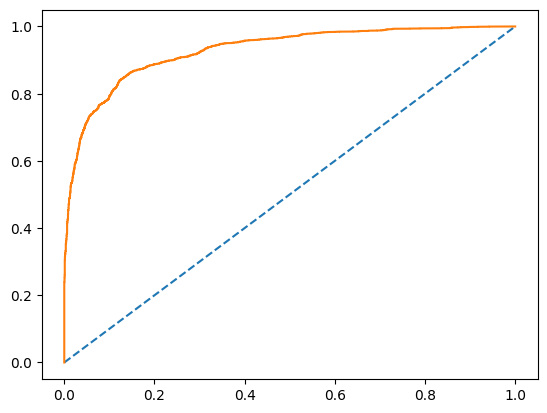

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
probs = model_lr.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:

model_lr.score(X_test, y_test)

0.839384878257155

AUC: 0.928


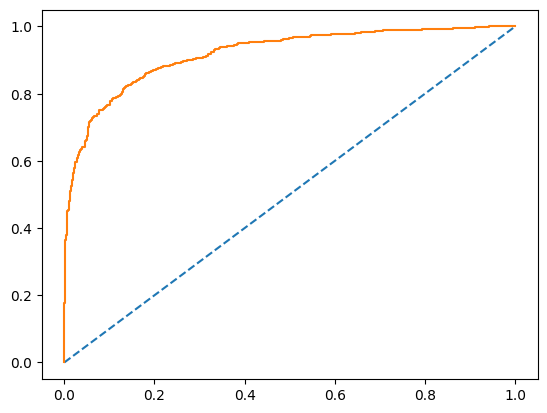

In [ ]:
probs = model_lr.predict_proba(X_test)

probs = probs[:, 1]

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

<Axes: >

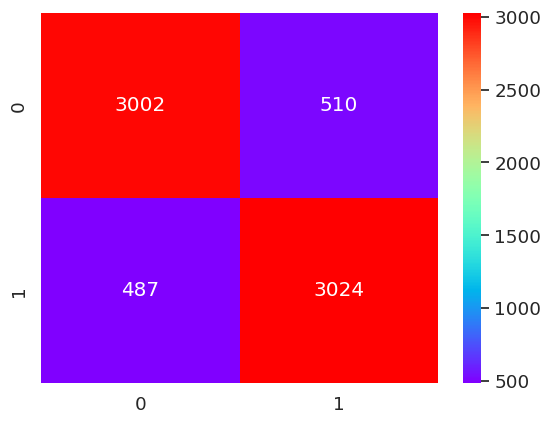

In [ ]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [ ]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

       False       0.86      0.85      0.86      3512
        True       0.86      0.86      0.86      3511

    accuracy                           0.86      7023
   macro avg       0.86      0.86      0.86      7023
weighted avg       0.86      0.86      0.86      7023



<Axes: >

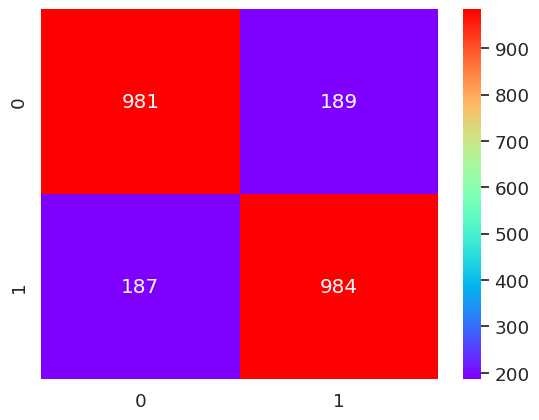

In [ ]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [ ]:
#Test Data Accuracy
test_acc=model_lr.score(X_test,y_test)
test_acc

0.839384878257155

In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1170
        True       0.84      0.84      0.84      1171

    accuracy                           0.84      2341
   macro avg       0.84      0.84      0.84      2341
weighted avg       0.84      0.84      0.84      2341



## Linear Discriminant Analysis


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()

In [ ]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8543357539513029
              precision    recall  f1-score   support

       False       0.86      0.85      0.85      3512
        True       0.85      0.86      0.85      3511

    accuracy                           0.85      7023
   macro avg       0.85      0.85      0.85      7023
weighted avg       0.85      0.85      0.85      7023



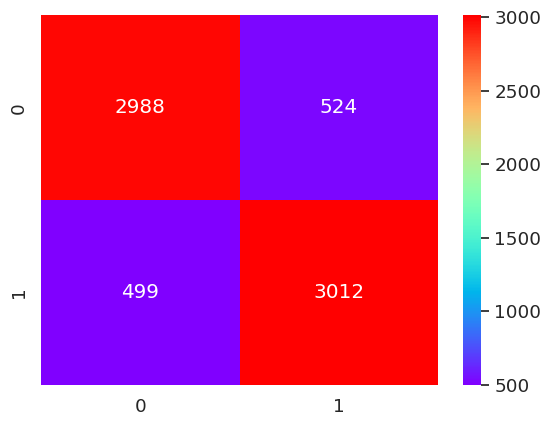

In [ ]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_train, y_train_predict))

0.8415207176420333
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1170
        True       0.84      0.85      0.84      1171

    accuracy                           0.84      2341
   macro avg       0.84      0.84      0.84      2341
weighted avg       0.84      0.84      0.84      2341



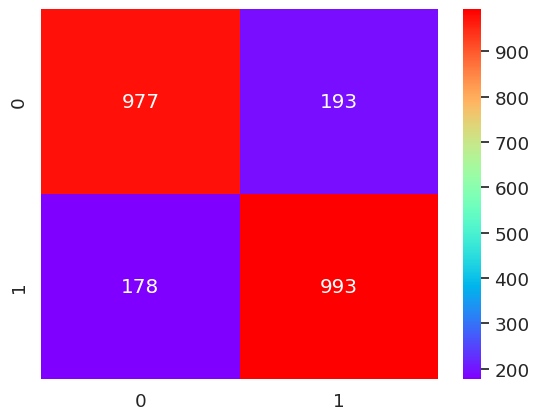

In [ ]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd', cmap='rainbow')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.927


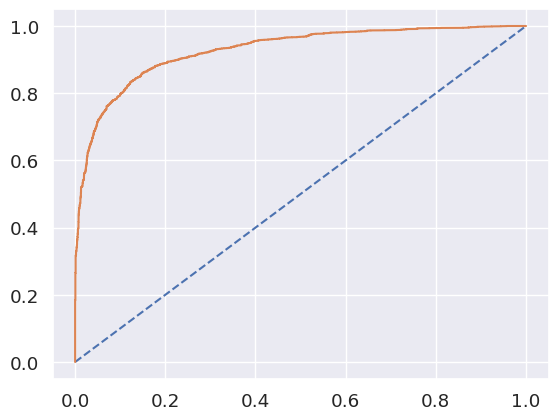

In [ ]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.927


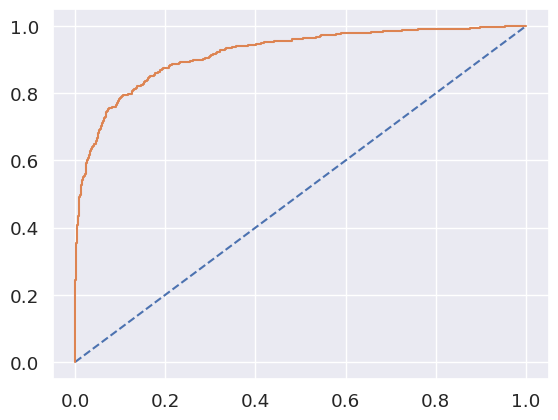

In [ ]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## Decision Tree

In [ ]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3512
        True       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023



<Axes: >

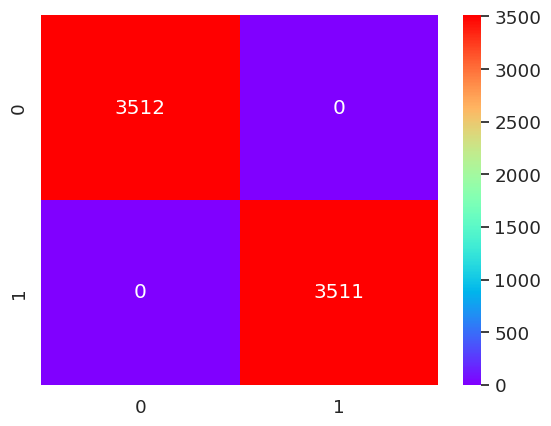

In [ ]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9517300299017514
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1170
        True       0.95      0.95      0.95      1171

    accuracy                           0.95      2341
   macro avg       0.95      0.95      0.95      2341
weighted avg       0.95      0.95      0.95      2341

Confusion Matrix


<Axes: >

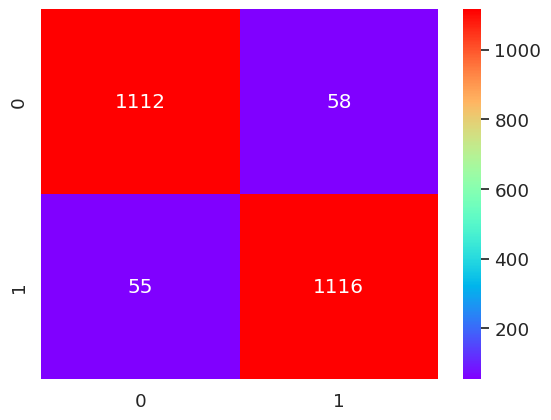

In [ ]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


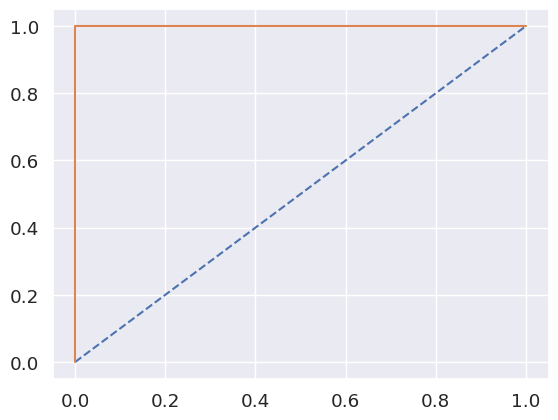

In [ ]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


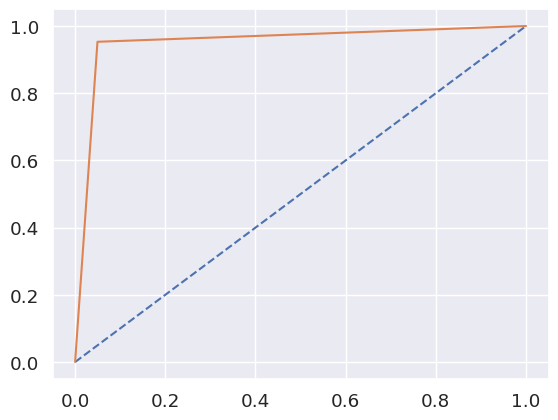

In [ ]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3512
        True       1.00      1.00      1.00      3511

    accuracy                           1.00      7023
   macro avg       1.00      1.00      1.00      7023
weighted avg       1.00      1.00      1.00      7023

Confusion Matrix


<Axes: >

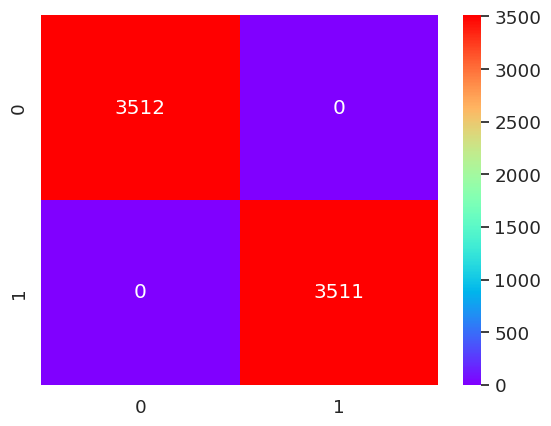

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.9837676206749253
              precision    recall  f1-score   support

       False       0.99      0.98      0.98      1170
        True       0.98      0.99      0.98      1171

    accuracy                           0.98      2341
   macro avg       0.98      0.98      0.98      2341
weighted avg       0.98      0.98      0.98      2341

Confusion Matrix


<Axes: >

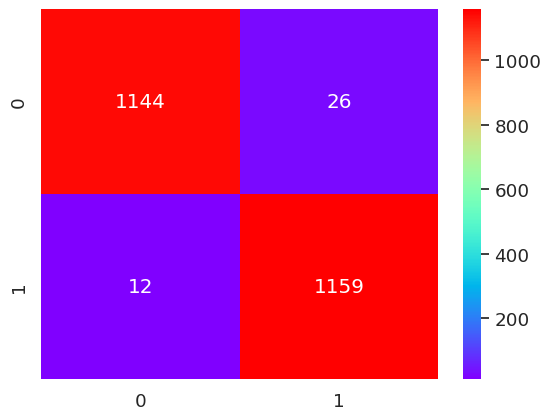

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


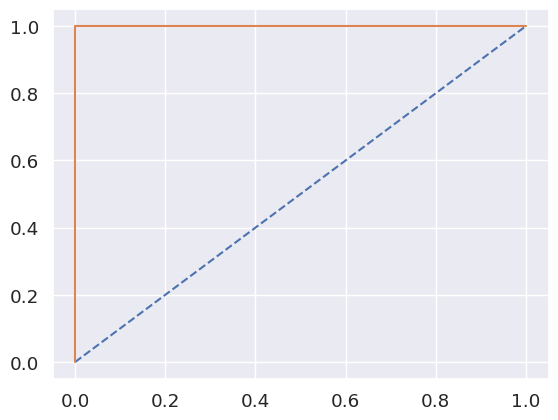

In [ ]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 1.000


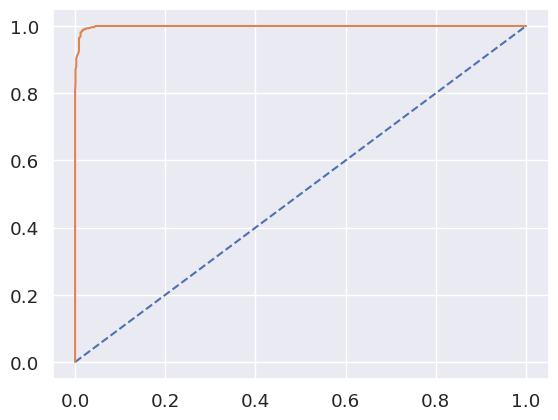

In [ ]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

0.954720205040581
              precision    recall  f1-score   support

       False       1.00      0.91      0.95      3512
        True       0.92      1.00      0.96      3511

    accuracy                           0.95      7023
   macro avg       0.96      0.95      0.95      7023
weighted avg       0.96      0.95      0.95      7023

Confusion Matrix


<Axes: >

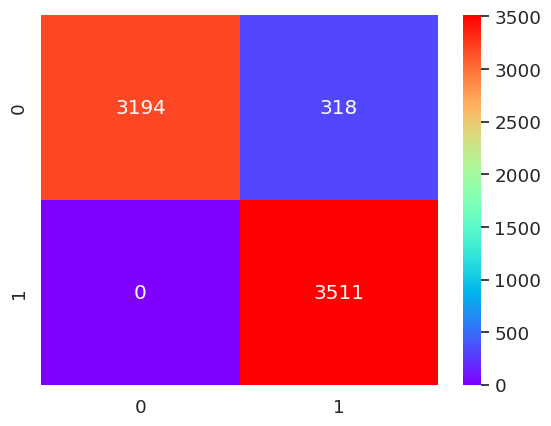

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.9282357966680905
              precision    recall  f1-score   support

       False       1.00      0.86      0.92      1170
        True       0.87      1.00      0.93      1171

    accuracy                           0.93      2341
   macro avg       0.94      0.93      0.93      2341
weighted avg       0.94      0.93      0.93      2341

Confusion Matrix


<Axes: >

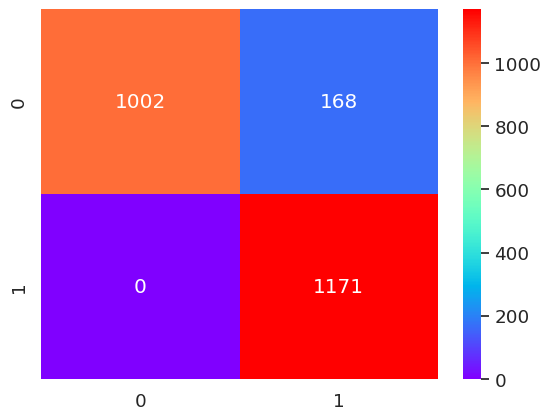

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


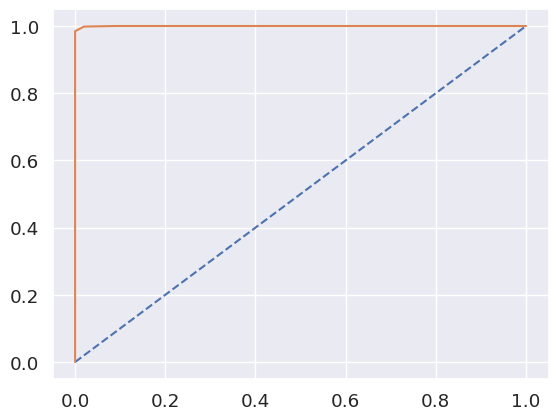

In [ ]:
probs = KNN_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 1.000


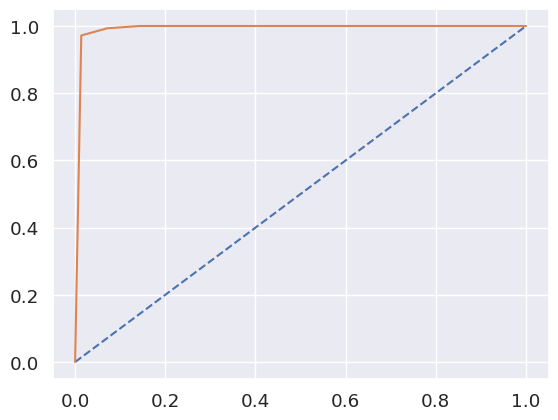

In [ ]:
probs = KNN_model.predict_proba(X_test)

probs = probs[:, 1]

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

## XGBoost

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import xgboost as xgb
from sklearn.base import BaseEstimator

class PatchedXGBClassifier(xgb.XGBClassifier, BaseEstimator):
    def __sklearn_tags__(self):
        return {
            "binary_only": False,
            "multilabel": False,
            "multioutput": False,
            "multioutput_only": False,
            "requires_positive_X": False,
            "requires_positive_y": False,
            "allow_nan": True,
            "poor_score": False,
            "no_validation": False,
        }

# Instantiate and train the patched classifier
XGB_model = PatchedXGBClassifier(random_state=1, learning_rate=0.01)
XGB_model.fit(X_train, y_train)

# Evaluate the model
y_pred = XGB_model.predict(X_test)
print(y_pred)


[0 0 1 ... 0 1 1]


0.9132849209739428
              precision    recall  f1-score   support

       False       0.90      0.93      0.91      3512
        True       0.93      0.90      0.91      3511

    accuracy                           0.91      7023
   macro avg       0.91      0.91      0.91      7023
weighted avg       0.91      0.91      0.91      7023

Confusion Matrix


<Axes: >

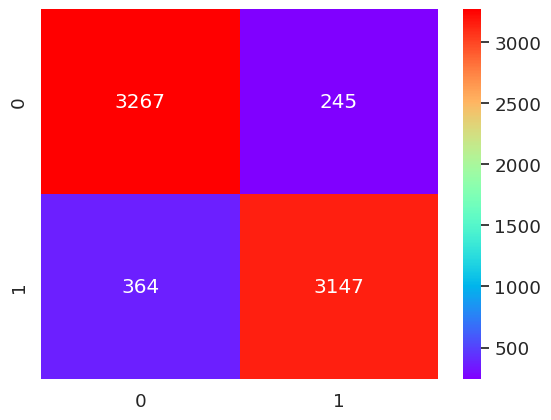

In [ ]:
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))

cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.9004698846646733
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      1170
        True       0.92      0.88      0.90      1171

    accuracy                           0.90      2341
   macro avg       0.90      0.90      0.90      2341
weighted avg       0.90      0.90      0.90      2341

Confusion Matrix


<Axes: >

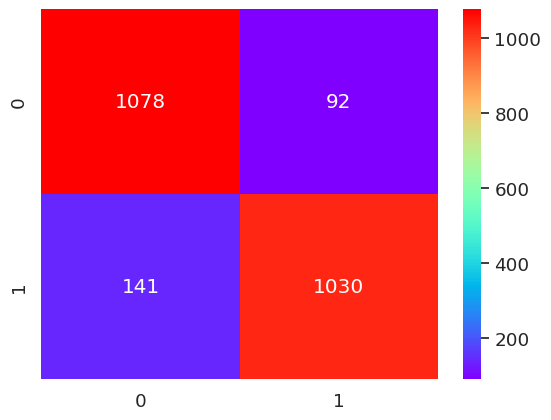

In [ ]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 0.974


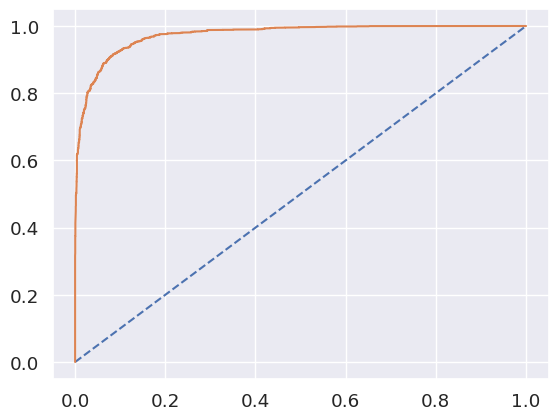

In [ ]:
probs = XGB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.974


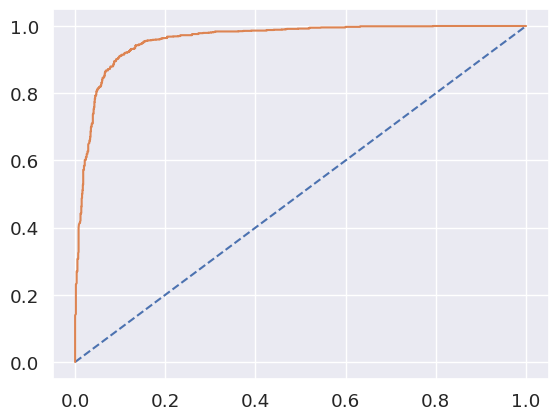

In [ ]:
probs = XGB_model.predict_proba(X_test)

probs = probs[:, 1]

test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class labels (0 or 1) for the training set
y_pred = XGB_model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.3f}')

precision = precision_score(y_train, y_pred)
print(f'Precision: {precision:.3f}')

recall = recall_score(y_train, y_pred)
print(f'Recall: {recall:.3f}')

f1 = f1_score(y_train, y_pred)
print(f'F1-Score: {f1:.3f}')


Accuracy: 0.913
Precision: 0.928
Recall: 0.896
F1-Score: 0.912


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib  # For loading saved models

# Load your trained model
model = XGB_model# Replace with your model's file path

# Function to get user input
def get_user_input():
    print("Please enter the following details:")
    features = {
        'Feature1': float(input("Enter Feature1: ")),
        'Feature2': float(input("Enter Feature2: ")),
        'Feature3': float(input("Enter Feature3: ")),
        'Feature4': float(input("Enter Feature4: ")),
        # Add more features as needed
    }
    return pd.DataFrame([features])

# Predict using the user input
def predict_churn():
    user_data = get_user_input()

    # Ensure preprocessing is consistent with training
    scaler = joblib.load('scaler_filename.pkl')  # Replace with your scaler's file path if used
    user_data_scaled = scaler.transform(user_data)

    prediction = model.predict(user_data_scaled)
    probability = model.predict_proba(user_data_scaled)[:, 1]

    if prediction[0] == 1:
        print("The user is predicted to churn.")
    else:
        print("The user is not predicted to churn.")

    print(f"Churn probability: {probability[0]:.2f}")

# Call the prediction function
predict_churn()


Please enter the following details:


Manual Predictions: [0 0 1 ... 0 1 1]
Default Predictions: [0 0 1 ... 0 1 1]


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle

# Load the trained XGBoost model (ensure the model file exists in the same directory)
# Example:
# with open("xgb_model.pkl", "rb") as file:
#     XGB_model = pickle.load(file)

# Placeholder for model (replace this with actual model loading)
class DummyModel:
    def predict(self, data):
        return [1]  # Always predicts churn for testing purposes
    def predict_proba(self, data):
        return [[0.3, 0.7]]  # Dummy probability values

XGB_model = DummyModel()

# Define a function for prediction
def predict_churn(customer_id, age, annual_income, total_purchase, account_age, session_count, is_premium_member, avg_session_time):
    # Prepare the input data
    input_data = pd.DataFrame({
        "Customer_ID": [customer_id],
        "Age": [age],
        "Annual_Income": [annual_income],
        "Total_Purchase": [total_purchase],
        "Account_Age": [account_age],
        "Session_Count": [session_count],
        "Is_Premium_Member": [1 if is_premium_member == "Yes" else 0],
        "Avg_Session_Time": [avg_session_time],
    })

    # Drop unnecessary fields for prediction (if Customer_ID is not used in training)
    if "Customer_ID" in input_data.columns:
        input_data = input_data.drop(columns=["Customer_ID"])

    # Perform prediction
    prediction = XGB_model.predict(input_data)
    prediction_proba = XGB_model.predict_proba(input_data)[:, 1]  # Probability of churn (assuming 1 = churn)

    # Output result
    if prediction[0] == 1:
        result = f"Customer is likely to churn with a probability of {prediction_proba[0]:.2f}."
    else:
        result = f"Customer is NOT likely to churn with a probability of {1 - prediction_proba[0]:.2f}."

    return result

# Define Gradio interface
input_fields = [
    gr.Textbox(label="Customer ID", placeholder="Enter Customer ID"),
    gr.Slider(18, 100, step=1, label="Age"),
    gr.Slider(10000, 200000, step=500, label="Annual Income (in USD)"),
    gr.Slider(0, 500, step=1, label="Total Purchases Made"),
    gr.Slider(0, 10, step=1, label="Account Age (in years)"),
    gr.Slider(0, 100, step=1, label="Number of Sessions"),
    gr.Radio(["Yes", "No"], label="Premium Membership"),
    gr.Slider(0.0, 10.0, step=0.1, label="Average Session Time (hours)"),
]

output_field = gr.Textbox(label="Churn Prediction Result")

# Create and launch the app
gr_interface = gr.Interface(
    fn=predict_churn,
    inputs=input_fields,
    outputs=output_field,
    title="E-commerce Customer Churn Prediction",
    description="Input customer data to predict the likelihood of churn."
)

if __name__ == "__main__":
    gr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://38293f0c9992a1bb3a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
